# Build Resilience Against Climate Change Focusing on Precipitation over the Mexico Metropolitan Area.
## Israel Sánchez Miranda A01378705
## Erick Hernández Silva A01750170
## Luis Ignacio Ferro Salinas A01378248

In [196]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# Preprocessing

## Load Files

In [197]:
df_cdmx_precipitation = pd.read_csv('./data/GWM-Total-precipitation-Distrito-Federal-Mexico.csv')
df_edomex_precipitation = pd.read_csv('./data/GWM-Total-precipitation-México-Mexico.csv')
df_morelos_precipitation = pd.read_csv('./data/GWM-Total-precipitation-Morelos-Mexico.csv')

df_cdmx_temperature = pd.read_csv('./data/GWM-Average-temperature-Distrito-Federal-Mexico.csv')
df_edomex_temperature = pd.read_csv('./data/GWM-Average-temperature-México-Mexico.csv')
df_morelos_temperature = pd.read_csv('./data/GWM-Average-temperature-Morelos-Mexico.csv')

df_cdmx_soil_water = pd.read_csv('./data/GWM-Soil-water-Distrito-Federal-Mexico.csv')
df_edomex_soil_water = pd.read_csv('./data/GWM-Soil-water-México-Mexico.csv')
df_morelos_soil_water = pd.read_csv('./data/GWM-Soil-water-Morelos-Mexico.csv')

df_cdmx_vegatation = pd.read_csv('./data/GWM-Vegetation-Distrito-Federal-Mexico.csv')
df_edomex_vegatation = pd.read_csv('./data/GWM-Vegetation-México-Mexico.csv')
df_morelos_vegatation = pd.read_csv('./data/GWM-Vegetation-Morelos-Mexico.csv')

df_cdmx_vegatation = pd.read_csv('./data/GWM-Vegetation-Distrito-Federal-Mexico.csv')
df_edomex_vegatation = pd.read_csv('./data/GWM-Vegetation-México-Mexico.csv')
df_morelos_vegatation = pd.read_csv('./data/GWM-Vegetation-Morelos-Mexico.csv')

df_cdmx_vegatation = pd.read_csv('./data/GWM-Vegetation-Distrito-Federal-Mexico.csv')
df_edomex_vegatation = pd.read_csv('./data/GWM-Vegetation-México-Mexico.csv')
df_morelos_vegatation = pd.read_csv('./data/GWM-Vegetation-Morelos-Mexico.csv')

df_cdmx_surface_water = pd.read_csv('./data/GWM-Surface-water-México-Mexico.csv')
df_edomex_surface_water = pd.read_csv('./data/GWM-Vegetation-México-Mexico.csv')
df_morelos_surface_water = pd.read_csv('./data/GWM-Surface-water-Morelos-Mexico.csv')


df_cdmx_water_underground = pd.read_csv('./data/GWM-Terrestrial-water-storage-México-Mexico.csv')
df_edomex_water_underground = pd.read_csv('./data/GWM-Terrestrial-water-storage-Distrito-Federal-Mexico.csv')
df_morelos_water_underground = pd.read_csv('./data/GWM-Terrestrial-water-storage-Morelos-Mexico.csv')


Precipitation in $mm^3$

In [198]:
# Show header of DataFrames.
print("df_cdmx_precipitation.head():")
print(df_cdmx_precipitation.head())

print("\ndf_edomex_precipitation.head():")
print(df_edomex_precipitation.head())

print("\ndf_morelos_precipitation.head():")
print(df_morelos_precipitation.head())

print("\ndf_cdmx_temperature.head():")
print(df_cdmx_temperature.head())

print("\ndf_edomex_temperature.head():")
print(df_edomex_temperature.head())

print("\ndf_morelos_temperature.head():")
print(df_morelos_temperature.head())

print("\ndf_cdmx_soil_water.head():")
print(df_cdmx_soil_water.head())

print("\ndf_edomex_soil_water.head():")
print(df_edomex_soil_water.head())

print("\ndf_morelos_soil_water.head():")
print(df_morelos_soil_water.head())

print("\ndf_cdmx_surface_water.head():")
print(df_cdmx_surface_water.head())

print("\ndf_edomex_surface_water.head():")
print(df_edomex_surface_water.head())

print("\ndf_morelos_surface_water.head():")
print(df_morelos_surface_water.head())

print("\ndf_cdmx_water_underground.head():")
print(df_cdmx_water_underground.head())

print("\ndf_edomex_water_underground.head():")
print(df_edomex_water_underground.head())

print("\ndf_morelos_water_underground.head():")
print(df_morelos_water_underground.head())

df_cdmx_precipitation.head():
      date  value
0  1979-01      2
1  1979-02     32
2  1979-03     14
3  1979-04     54
4  1979-05     76

df_edomex_precipitation.head():
      date  value
0  1979-01      1
1  1979-02     27
2  1979-03      8
3  1979-04     28
4  1979-05     73

df_morelos_precipitation.head():
      date  value
0  1979-01      0
1  1979-02      9
2  1979-03      3
3  1979-04     32
4  1979-05     79

df_cdmx_temperature.head():
      date  value
0  1979-01   12.4
1  1979-02   13.1
2  1979-03   15.4
3  1979-04   16.6
4  1979-05   16.9

df_edomex_temperature.head():
      date  value
0  1979-01   13.3
1  1979-02   14.0
2  1979-03   16.2
3  1979-04   18.0
4  1979-05   18.2

df_morelos_temperature.head():
      date  value
0  1979-01   18.7
1  1979-02   20.4
2  1979-03   22.5
3  1979-04   23.6
4  1979-05   23.7

df_cdmx_soil_water.head():
      date  value
0  1991-01   0.29
1  1991-02   0.25
2  1991-03   0.25
3  1991-04   0.24
4  1991-05   0.30

df_edomex_soil_water.head(

## Normalization

We applied normalization on the variable of **precipitation**, to keep it in the 0-1 range, because according to Wickham [1], normalization is useful for tidying and eliminating inconsistencies.

In [199]:


# Function to normalize DataFrame using Min-Max scaler.
def normalize_df(df):
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized['value'] = scaler.fit_transform(df[['value']])
    return df_normalized

In [200]:
# Normalize DataFrames
df_cdmx_precipitation_normalized = normalize_df(df_cdmx_precipitation)
df_edomex_precipitation_normalized = normalize_df(df_edomex_precipitation)
df_morelos_precipitation_normalized = normalize_df(df_morelos_precipitation)

df_cdmx_temperature_normalized = normalize_df(df_cdmx_temperature)
df_edomex_temperature_normalized = normalize_df(df_edomex_temperature)
df_morelos_temperature_normalized = normalize_df(df_morelos_temperature)

df_cdmx_soil_water_normalized = normalize_df(df_cdmx_soil_water)
df_edomex_soil_water_normalized = normalize_df(df_edomex_soil_water)
df_morelos_soil_water_normalized = normalize_df(df_morelos_soil_water)

df_cdmx_surface_water_normalized = normalize_df(df_cdmx_surface_water)
df_edomex_surface_water_normalized = normalize_df(df_edomex_surface_water)
df_morelos_surface_water_normalized = normalize_df(df_morelos_surface_water)

df_cdmx_water_underground_normalized = normalize_df(df_cdmx_water_underground)
df_edomex_water_underground_normalized = normalize_df(df_edomex_water_underground)
df_morelos_water_underground_normalized = normalize_df(df_morelos_water_underground)

In [201]:
# Show normalized DataFrames.
print("df_cdmx_precipitation_normalized.head():")
print(df_cdmx_precipitation_normalized.head())

print("\ndf_edomex_precipitation_normalized.head():")
print(df_edomex_precipitation_normalized.head())

print("\ndf_morelos_precipitation_normalized.head():")
print(df_morelos_precipitation_normalized.head())

print("\ndf_cdmx_temperature_normalized.head():")
print(df_cdmx_temperature_normalized.head())

print("\ndf_edomex_temperature_normalized.head():")
print(df_edomex_temperature_normalized.head())

print("\ndf_morelos_temperature_normalized.head():")
print(df_morelos_temperature_normalized.head())

print("\ndf_cdmx_soil_water_normalized.head():")
print(df_cdmx_soil_water_normalized.head())

print("\ndf_edomex_soil_water_normalized.head():")
print(df_edomex_soil_water_normalized.head())

print("\ndf_morelos_soil_water_normalized.head():")
print(df_morelos_soil_water_normalized.head())

print("\ndf_cdmx_surface_water_normalized.head():")
print(df_cdmx_surface_water_normalized.head())

print("\ndf_edomex_surface_water_normalized.head():")
print(df_edomex_surface_water_normalized.head())

print("\ndf_morelos_surface_water_normalized.head():")
print(df_morelos_surface_water_normalized.head())

print("\ndf_cdmx_water_underground_normalized.head():")
print(df_cdmx_water_underground_normalized.head())

print("\ndf_edomex_water_underground_normalized.head():")
print(df_edomex_water_underground_normalized.head())

print("\ndf_morelos_water_underground_normalized.head():")
print(df_morelos_water_underground_normalized.head())

df_cdmx_precipitation_normalized.head():
      date     value
0  1979-01  0.006061
1  1979-02  0.096970
2  1979-03  0.042424
3  1979-04  0.163636
4  1979-05  0.230303

df_edomex_precipitation_normalized.head():
      date     value
0  1979-01  0.003236
1  1979-02  0.087379
2  1979-03  0.025890
3  1979-04  0.090615
4  1979-05  0.236246

df_morelos_precipitation_normalized.head():
      date     value
0  1979-01  0.000000
1  1979-02  0.020595
2  1979-03  0.006865
3  1979-04  0.073227
4  1979-05  0.180778

df_cdmx_temperature_normalized.head():
      date     value
0  1979-01  0.166667
1  1979-02  0.244444
2  1979-03  0.500000
3  1979-04  0.633333
4  1979-05  0.666667

df_edomex_temperature_normalized.head():
      date     value
0  1979-01  0.164835
1  1979-02  0.241758
2  1979-03  0.483516
3  1979-04  0.681319
4  1979-05  0.703297

df_morelos_temperature_normalized.head():
      date     value
0  1979-01  0.155556
1  1979-02  0.344444
2  1979-03  0.577778
3  1979-04  0.700000
4  1979-05

In [202]:
# We rename the columns.
df_cdmx_precipitation_normalized = df_cdmx_precipitation_normalized.rename(columns={"value": "precipitation_value_cdmx"})
df_edomex_precipitation_normalized = df_edomex_precipitation_normalized.rename(columns={"value": "precipitation_value_edomex"})
df_morelos_precipitation_normalized = df_morelos_precipitation_normalized.rename(columns={"value": "precipitation_value_morelos"})

df_cdmx_temperature_normalized = df_cdmx_temperature_normalized.rename(columns={"value": "temperature_value_cdmx"})
df_edomex_temperature_normalized = df_edomex_temperature_normalized.rename(columns={"value": "temperature_value_edomex"})
df_morelos_temperature_normalized = df_morelos_temperature_normalized.rename(columns={"value": "temperature_value_morelos"})

df_cdmx_soil_water_normalized = df_cdmx_soil_water_normalized.rename(columns={"value": "soil_water_value_cdmx"})
df_edomex_soil_water_normalized = df_edomex_soil_water_normalized.rename(columns={"value": "soil_water_value_edomex"})
df_morelos_soil_water_normalized = df_morelos_soil_water_normalized.rename(columns={"value": "soil_water_value_morelos"})

df_cdmx_surface_water_normalized = df_cdmx_surface_water_normalized.rename(columns={"value": "surface_water_value_cdmx"})
df_edomex_surface_water_normalized = df_edomex_surface_water_normalized.rename(columns={"value": "surface_water_value_edomex"})
df_morelos_surface_water_normalized = df_morelos_surface_water_normalized.rename(columns={"value": "surface_water_value_morelos"})

df_cdmx_water_underground_normalized = df_cdmx_water_underground_normalized.rename(columns={"value": "water_underground_value_cdmx"})
df_edomex_water_underground_normalized = df_edomex_water_underground_normalized.rename(columns={"value": "water_underground_value_edomex"})
df_morelos_water_underground_normalized = df_morelos_water_underground_normalized.rename(columns={"value": "water_underground_value_morelos"})


In [203]:
# Combine DataFrames for each region.
df_cdmx_list = [
    df_cdmx_precipitation_normalized, df_cdmx_temperature_normalized, df_cdmx_soil_water_normalized, 
    df_cdmx_surface_water_normalized, df_cdmx_water_underground_normalized
]
df_edomex_list = [
    df_edomex_precipitation_normalized, df_edomex_temperature_normalized, df_edomex_soil_water_normalized, 
    df_edomex_surface_water_normalized, df_edomex_water_underground_normalized
]
df_morelos_list = [
    df_morelos_precipitation_normalized, df_morelos_temperature_normalized, df_morelos_soil_water_normalized, 
    df_morelos_surface_water_normalized, df_morelos_water_underground_normalized
]

We came up with a way to combine the different time-series datasets. Since all of them had a common variable **date**, we used this variable as the index in the DataFrame. This way, we could have multiple features for each date.

We justified this approach, because, According to Wickham [1], to combine tidy datasets, *"All that is needed is a join operator that works by matching common variables and adding new columns."* In this case, the variable **date** was that common variable.

In [204]:
# Function to combine DataFrames based on 'date' column.
def merge_dataframes_on_date(df_list):
    from functools import reduce
    data = reduce(lambda left, right: pd.merge(left, right, on='date', how='outer'), df_list)
    return data


In [205]:
# Generate combined datasets.
data_cdmx = merge_dataframes_on_date(df_cdmx_list)
data_edomex = merge_dataframes_on_date(df_edomex_list)
data_morelos = merge_dataframes_on_date(df_morelos_list)

In [206]:
# Show combined datasets.
print("CDMX Data:")
data_cdmx.head(500)

CDMX Data:


,date,precipitation_value_cdmx,temperature_value_cdmx,soil_water_value_cdmx,surface_water_value_cdmx,water_underground_value_cdmx
0,1979-01,0.006061,0.166667,NaN,NaN,NaN
1,1979-02,0.096970,0.244444,NaN,NaN,NaN
2,1979-03,0.042424,0.500000,NaN,NaN,NaN
3,1979-04,0.163636,0.633333,NaN,NaN,NaN
4,1979-05,0.230303,0.666667,NaN,NaN,NaN
...,...,...,...,...,...,...
495,2020-06,0.363636,0.788889,0.777778,0.5,0.312857
496,2020-07,0.675758,0.655556,0.944444,0.5,0.362857
497,2020-08,0.612121,0.600000,0.888889,0.5,0.400000
498,2020-09,0.563636,0.544444,0.833333,0.5,0.454286


In [207]:
print("\nEdomex Data:")
data_edomex.head(500)


Edomex Data:


,date,precipitation_value_edomex,temperature_value_edomex,soil_water_value_edomex,surface_water_value_edomex,water_underground_value_edomex
0,1979-01,0.003236,0.164835,NaN,NaN,NaN
1,1979-02,0.087379,0.241758,NaN,NaN,NaN
2,1979-03,0.025890,0.483516,NaN,NaN,NaN
3,1979-04,0.090615,0.681319,NaN,NaN,NaN
4,1979-05,0.236246,0.703297,NaN,NaN,NaN
...,...,...,...,...,...,...
495,2020-06,0.375405,0.769231,0.6875,0.428571,0.324549
496,2020-07,0.711974,0.670330,0.9375,0.753247,0.363384
497,2020-08,0.695793,0.604396,0.8750,0.928571,0.388350
498,2020-09,0.530744,0.549451,0.8750,0.967532,0.428571


In [208]:
print("\nMorelos Data:")
data_morelos.head(500)


Morelos Data:


,date,precipitation_value_morelos,temperature_value_morelos,soil_water_value_morelos,surface_water_value_morelos,water_underground_value_morelos
0,1979-01,0.000000,0.155556,NaN,NaN,NaN
1,1979-02,0.020595,0.344444,NaN,NaN,NaN
2,1979-03,0.006865,0.577778,NaN,NaN,NaN
3,1979-04,0.073227,0.700000,NaN,NaN,NaN
4,1979-05,0.180778,0.711111,NaN,NaN,NaN
...,...,...,...,...,...,...
495,2020-06,0.421053,0.722222,0.809524,0.0,0.315562
496,2020-07,0.627002,0.544444,0.952381,0.0,0.361671
497,2020-08,0.565217,0.488889,0.904762,0.0,0.407781
498,2020-09,0.606407,0.444444,0.904762,0.0,0.468300


## Handling Missing Values

In [209]:
# Verify Nulls and NaNs.
nulls_data_cdmx = data_cdmx.isnull().sum()
print("Valores nulos en data_cdmx:")
print(nulls_data_cdmx)

nulls_data_edomex = data_edomex.isnull().sum()
print("\nValores nulos en data_edomex:")
print(nulls_data_edomex)

nulls_data_morelos = data_morelos.isnull().sum()
print("\nValores nulos en data_morelos:")
print(nulls_data_morelos)


Valores nulos en data_cdmx:
date                              0
precipitation_value_cdmx          2
temperature_value_cdmx            0
soil_water_value_cdmx           146
surface_water_value_cdmx        268
water_underground_value_cdmx    321
dtype: int64

Valores nulos en data_edomex:
date                                0
precipitation_value_edomex          2
temperature_value_edomex            0
soil_water_value_edomex           146
surface_water_value_edomex        268
water_underground_value_edomex    321
dtype: int64

Valores nulos en data_morelos:
date                                 0
precipitation_value_morelos          2
temperature_value_morelos            0
soil_water_value_morelos           159
surface_water_value_morelos        268
water_underground_value_morelos    321
dtype: int64


### Treating precipitation nulls


We encountered 2 missing values of the precipitation variable. For this, we proposed a novel approach. Suppose that the precipitation for the day 1-1-2000. To provide a value for this measurement, we looked at the measurement values for the same day in the surrounding eight years, since this variable is a seasonal phenomenon, and used the average of those observations to fill the missing value.

In [210]:
def get_null_precipitation_context(data, column_name):
    # Ensure that the 'date' column is in datetime format.
    data['date'] = pd.to_datetime(data['date'])
    
    # Create a copy of the DataFrame to avoid modifying the original.
    data_copy = data.copy()
    
    # Identify the rows with null values in the precipitation column.
    null_indices = data_copy[data_copy[column_name].isnull()].index
    
    # Create a list to store the contexts.
    contexts = []

    for idx in null_indices:
        # Obtain the context of the 4 previous rows and the 4 following rows.
        context_start = max(idx - 4, 0)
        context_end = min(idx + 5, len(data_copy))
        context = data_copy.iloc[context_start:context_end]
        contexts.append(context)

    return contexts

In [211]:
def fill_precipitation_nulls(data, column_name):
    # Ensure that the 'date' column is in datetime format.
    data['date'] = pd.to_datetime(data['date'])
    
    # Create a column for year, month, and day.
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    
    # Function to calculate the average precipitation.
    def calculate_mean(row):
        year, month, day = row['year'], row['month'], row['day']
        # Filter the data for the 4 previous years and 4 following years on the same day and month.
        relevant_data = data[((data['year'] >= year - 4) & (data['year'] <= year + 4)) & 
                             (data['month'] == month) & (data['day'] == day)]
        # Remove the current year to avoid bias.
        relevant_data = relevant_data[relevant_data['year'] != year]
        print(relevant_data)
        return relevant_data[column_name].mean()
    
    # Apply the imputation function only to rows with null values.
    data[column_name] = data.apply(lambda row: calculate_mean(row) if pd.isnull(row[column_name]) else row[column_name], axis=1)
    
    # Delete the auxiliary columns.
    data.drop(columns=['year', 'month', 'day'], inplace=True)
    
    return data

In [212]:
data_cdmx = fill_precipitation_nulls(data_cdmx, 'precipitation_value_cdmx')
data_edomex = fill_precipitation_nulls(data_edomex, 'precipitation_value_edomex')
data_morelos = fill_precipitation_nulls(data_morelos, 'precipitation_value_morelos')

          date  precipitation_value_cdmx  temperature_value_cdmx  \
83  1985-12-01                  0.069697                0.077778   
95  1986-12-01                  0.100000                0.144444   
107 1987-12-01                  0.063636                0.311111   
119 1988-12-01                  0.018182                0.177778   
142 1990-12-01                  0.036364                0.144444   
154 1991-12-01                  0.069697                0.155556   
166 1992-12-01                  0.018182                0.222222   
178 1993-12-01                  0.003030                0.177778   

     soil_water_value_cdmx  surface_water_value_cdmx  \
83                     NaN                       NaN   
95                     NaN                       NaN   
107                    NaN                       NaN   
119                    NaN                       NaN   
142                    NaN                       NaN   
154               0.388889                       Na

In [213]:
data_cdmx.iloc[131]

date                            1990-01-01 00:00:00
precipitation_value_cdmx                   0.060606
temperature_value_cdmx                     0.222222
soil_water_value_cdmx                           NaN
surface_water_value_cdmx                        NaN
water_underground_value_cdmx                    NaN
Name: 131, dtype: object

### Treating soil water

For the treatment of soil water missing values, we have proposed to create a linear regression model, which would predict what would be the value for the missing soil water, using the rest of the dependent variables as features. We began this analysis by creating a correlation matrix.

#### Correlation matrix

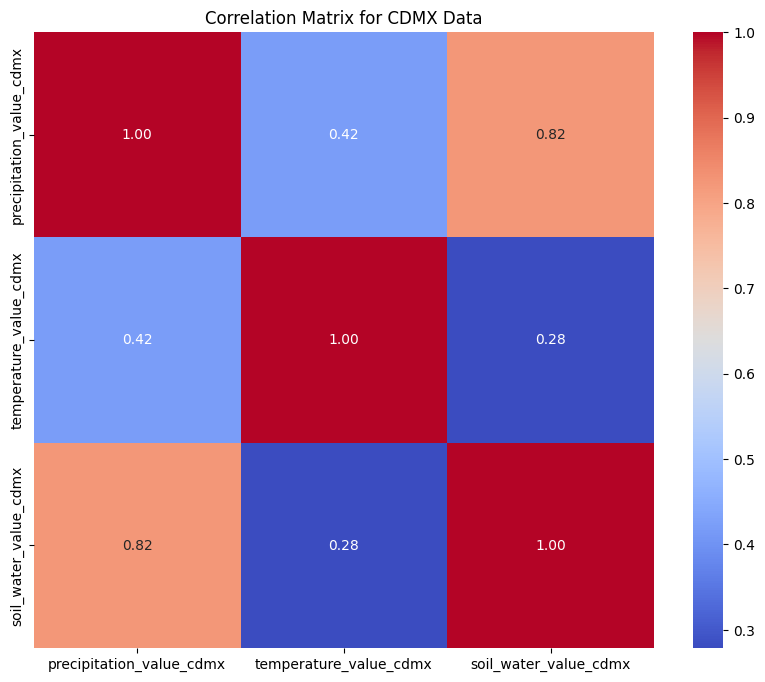

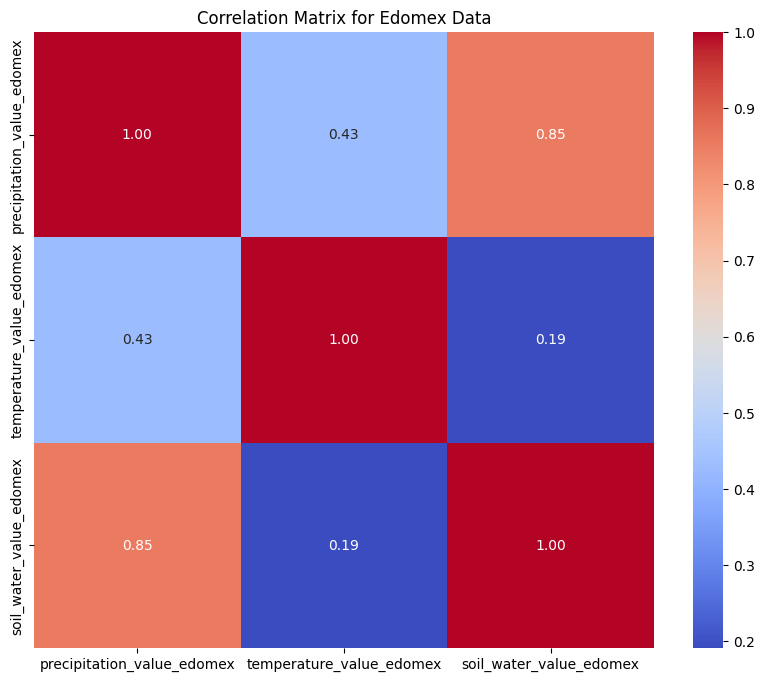

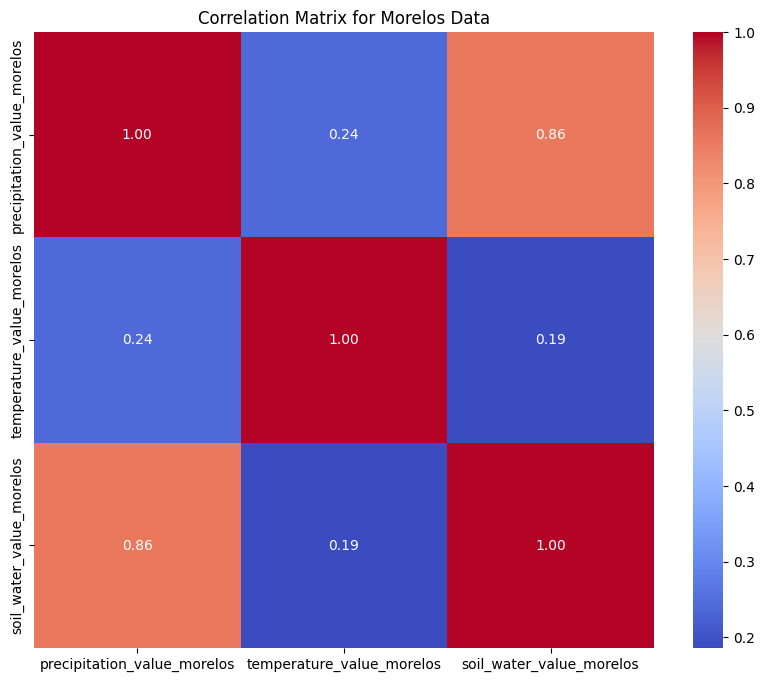

In [214]:
# Calculate the correlation matrix.
def calculate_correlation_matrix(data, columns):
    correlation_matrix = data[columns].corr()
    return correlation_matrix

# Visualize the correlation matrix.
def plot_correlation_matrix(correlation_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

# Select the relevant columns.
columns_cdmx = ['precipitation_value_cdmx', 'temperature_value_cdmx', 'soil_water_value_cdmx']
columns_edomex = ['precipitation_value_edomex', 'temperature_value_edomex', 'soil_water_value_edomex']
columns_morelos = ['precipitation_value_morelos', 'temperature_value_morelos', 'soil_water_value_morelos']

# Calculate and display the correlation matrix for data_cdmx.
correlation_matrix_cdmx = calculate_correlation_matrix(data_cdmx, columns_cdmx)
plot_correlation_matrix(correlation_matrix_cdmx, 'Correlation Matrix for CDMX Data')

# Calculate and display the correlation matrix for data_edomex.
correlation_matrix_edomex = calculate_correlation_matrix(data_edomex, columns_edomex)
plot_correlation_matrix(correlation_matrix_edomex, 'Correlation Matrix for Edomex Data')

# Calculate and display the correlation matrix for data_morelos.
correlation_matrix_morelos = calculate_correlation_matrix(data_morelos, columns_morelos)
plot_correlation_matrix(correlation_matrix_morelos, 'Correlation Matrix for Morelos Data')

#### Linear Regresion for predicting soil water

In [215]:
# Function to train the model and obtain metrics
def linear_regression_metrics(data, target_column, feature_columns):
    # Filter rows with no null values in relevant columns
    complete_data = data.dropna(subset=[target_column] + feature_columns)
    
    # Define dependent and independent variables
    X = complete_data[feature_columns]
    y = complete_data[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    
    return model

# Function to impute null values using the trained model
def impute_nulls_with_model(data, target_column, feature_columns, model):
    # Predict null values
    null_data = data[data[target_column].isnull()]
    if not null_data.empty:
        null_data_features = null_data[feature_columns]
        predicted_values = model.predict(null_data_features)
        data.loc[data[target_column].isnull(), target_column] = predicted_values
    
    return data

After looking at the correlation matrices, we decided to use the following variables to fill the missing values of the soil water, depending on the different region:
**precipitation, temperature**

In [216]:
# Define the feature columns and the target.
feature_columns_cdmx = ['precipitation_value_cdmx', 'temperature_value_cdmx']
target_column_cdmx = 'soil_water_value_cdmx'

feature_columns_edomex = ['precipitation_value_edomex', 'temperature_value_edomex']
target_column_edomex = 'soil_water_value_edomex'

feature_columns_morelos = ['precipitation_value_morelos', 'temperature_value_morelos']
target_column_morelos = 'soil_water_value_morelos'

In [217]:
# Get metrics for the model for data_cdmx.
print("Metrics for CDMX:")
model_cdmx = linear_regression_metrics(data_cdmx, target_column_cdmx, feature_columns_cdmx)

# Get metrics for the model for data_edomex.
print("\Metrics for Edomex:")
model_edomex = linear_regression_metrics(data_edomex, target_column_edomex, feature_columns_edomex)

# Get metrics for the model for data_morelos.
print("\Metrics for Morelos:")
model_morelos = linear_regression_metrics(data_morelos, target_column_morelos, feature_columns_morelos)


Metrics for CDMX:
Mean Squared Error (MSE): 0.01402422677459709
Mean Absolute Error (MAE): 0.092641796058201
\Metrics for Edomex:
Mean Squared Error (MSE): 0.020281196841823425
Mean Absolute Error (MAE): 0.11245906469271386
\Metrics for Morelos:
Mean Squared Error (MSE): 0.01457633742218137
Mean Absolute Error (MAE): 0.0995004861994985


In [218]:
# Impute null values using the trained model for each DataFrame.
data_cdmx = impute_nulls_with_model(data_cdmx, target_column_cdmx, feature_columns_cdmx, model_cdmx)
data_edomex = impute_nulls_with_model(data_edomex, target_column_edomex, feature_columns_edomex, model_edomex)
data_morelos = impute_nulls_with_model(data_morelos, target_column_morelos, feature_columns_morelos, model_morelos)


We review the variables that still have missing values.

In [219]:
# Check for null and NaN values in data_cdmx.
nulls_data_cdmx = data_cdmx.isnull().sum()
print("Missing values in data_cdmx:")
print(nulls_data_cdmx)

# Check for null and NaN values in data_edomex.
nulls_data_edomex = data_edomex.isnull().sum()
print("\Missing values in data_edomex:")
print(nulls_data_edomex)

# Check for null and NaN values in data_morelos.
nulls_data_morelos = data_morelos.isnull().sum()
print("\Missing values in data_morelos:")
print(nulls_data_morelos)

Missing values in data_cdmx:
date                              0
precipitation_value_cdmx          0
temperature_value_cdmx            0
soil_water_value_cdmx             0
surface_water_value_cdmx        268
water_underground_value_cdmx    321
dtype: int64
\Missing values in data_edomex:
date                                0
precipitation_value_edomex          0
temperature_value_edomex            0
soil_water_value_edomex             0
surface_water_value_edomex        268
water_underground_value_edomex    321
dtype: int64
\Missing values in data_morelos:
date                                 0
precipitation_value_morelos          0
temperature_value_morelos            0
soil_water_value_morelos             0
surface_water_value_morelos        268
water_underground_value_morelos    321
dtype: int64


### Treating surface water nulls

We used the same reasoning of the soil water to fill missing values here.

#### Correlation matrix

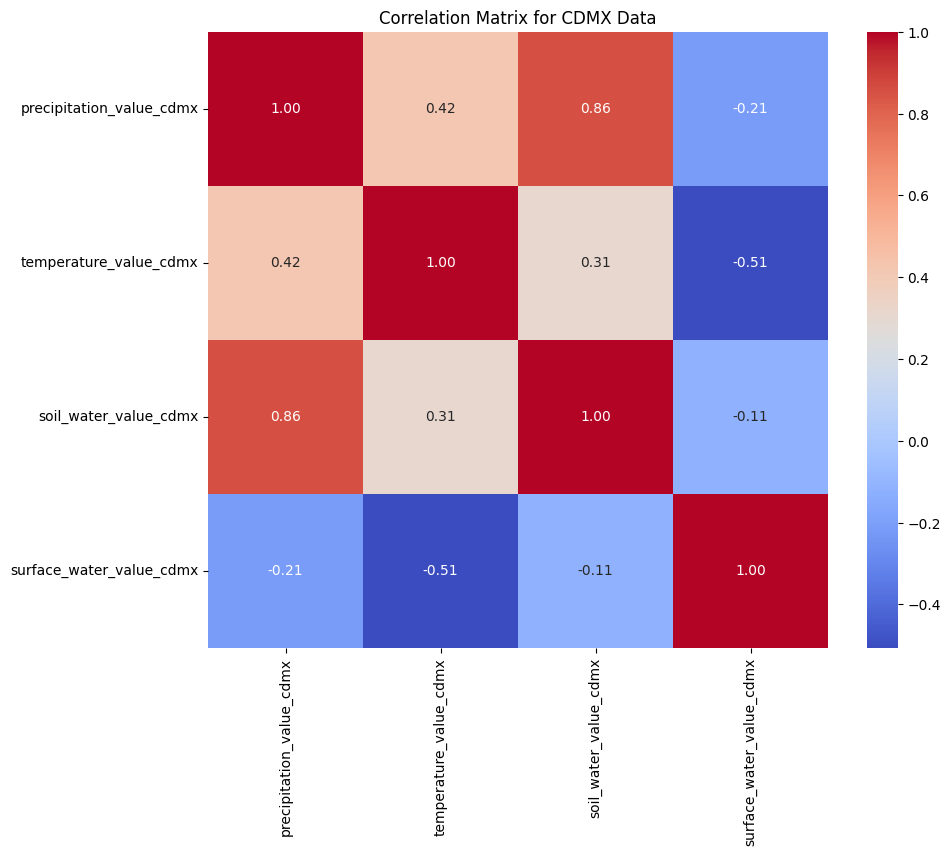

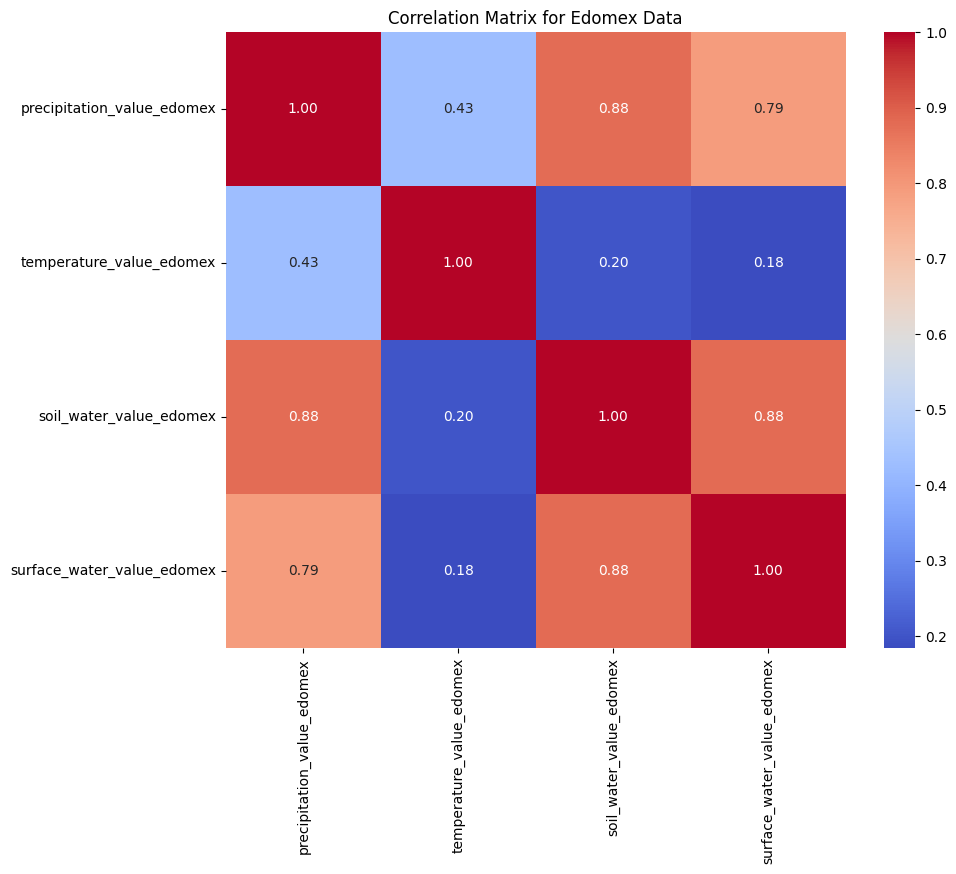

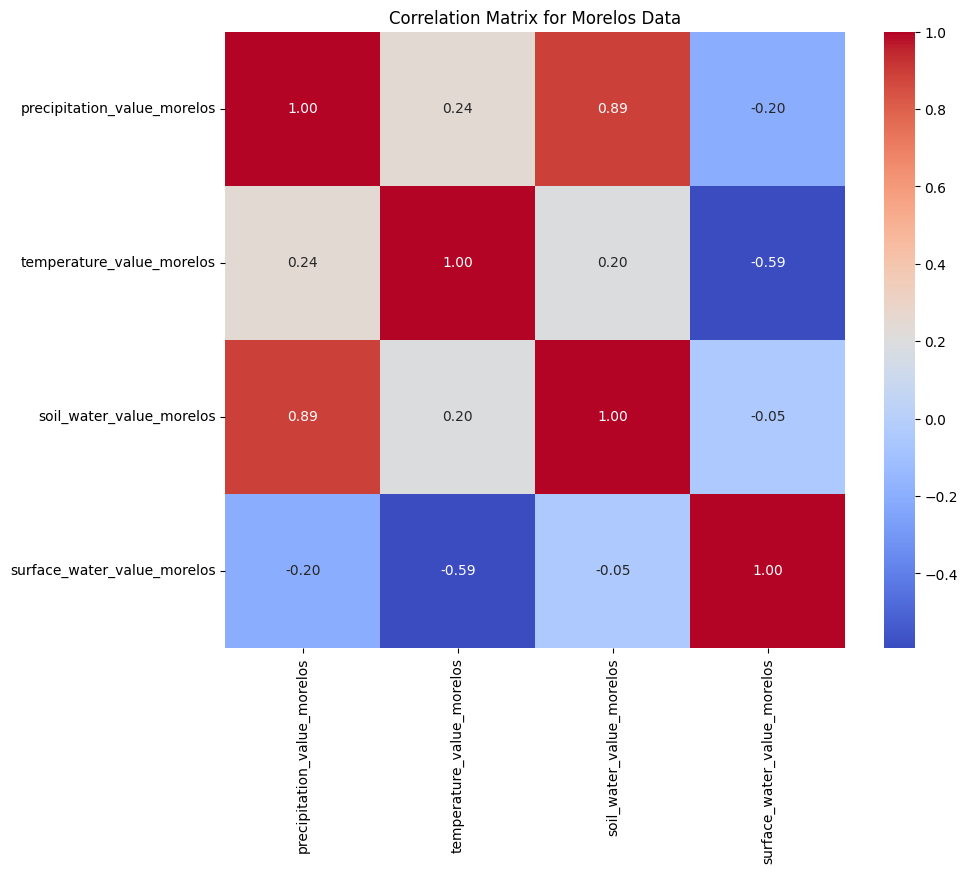

In [220]:
# Select the relevant columns.
columns_cdmx = ['precipitation_value_cdmx', 'temperature_value_cdmx', 'soil_water_value_cdmx', 'surface_water_value_cdmx']
columns_edomex = ['precipitation_value_edomex', 'temperature_value_edomex', 'soil_water_value_edomex', 'surface_water_value_edomex']
columns_morelos = ['precipitation_value_morelos', 'temperature_value_morelos', 'soil_water_value_morelos', 'surface_water_value_morelos']

# Calculate and display the correlation matrix for data_cdmx.
correlation_matrix_cdmx = calculate_correlation_matrix(data_cdmx, columns_cdmx)
plot_correlation_matrix(correlation_matrix_cdmx, 'Correlation Matrix for CDMX Data')

# Calculate and display the correlation matrix for data_edomex.
correlation_matrix_edomex = calculate_correlation_matrix(data_edomex, columns_edomex)
plot_correlation_matrix(correlation_matrix_edomex, 'Correlation Matrix for Edomex Data')

# Calculate and display the correlation matrix for data_morelos.
correlation_matrix_morelos = calculate_correlation_matrix(data_morelos, columns_morelos)
plot_correlation_matrix(correlation_matrix_morelos, 'Correlation Matrix for Morelos Data')


#### Linear regression

In [221]:
# Define the feature columns and the target.
feature_columns_cdmx = ['temperature_value_cdmx']
target_column_cdmx = 'surface_water_value_cdmx'

feature_columns_edomex = ['precipitation_value_edomex', 'soil_water_value_edomex']
target_column_edomex = 'surface_water_value_edomex'

feature_columns_morelos = ['temperature_value_morelos','precipitation_value_morelos', 'soil_water_value_morelos']
target_column_morelos = 'surface_water_value_morelos'

# Get metrics for the model for data_cdmx.
print("Metrics for CDMX (using temperature):")
model_cdmx = linear_regression_metrics(data_cdmx, target_column_cdmx, feature_columns_cdmx)

# Get metrics for the model for data_edomex.
print("\nMetrics for Edomex (using precipitation and soil_water):")
model_edomex = linear_regression_metrics(data_edomex, target_column_edomex, feature_columns_edomex)

# Get metrics for the model for data_morelos.
print("\nMetrics for Morelos (using temperature):")
model_morelos = linear_regression_metrics(data_morelos, target_column_morelos, feature_columns_morelos)


Metrics for CDMX (using temperature):
Mean Squared Error (MSE): 0.03734937900586853
Mean Absolute Error (MAE): 0.15378855615522932

Metrics for Edomex (using precipitation and soil_water):
Mean Squared Error (MSE): 0.019434616633213855
Mean Absolute Error (MAE): 0.11052049747902924

Metrics for Morelos (using temperature):
Mean Squared Error (MSE): 0.12812480888831906
Mean Absolute Error (MAE): 0.30628969141017537


In [222]:
# Impute null values using the trained model for each DataFrame
data_cdmx = impute_nulls_with_model(data_cdmx, target_column_cdmx, feature_columns_cdmx, model_cdmx)
data_edomex = impute_nulls_with_model(data_edomex, target_column_edomex, feature_columns_edomex, model_edomex)
data_morelos = impute_nulls_with_model(data_morelos, target_column_morelos, feature_columns_morelos, model_morelos)


In [223]:
# Check for null and NaN values in data_cdmx
nulls_data_cdmx = data_cdmx.isnull().sum()
print("Null values in data_cdmx:")
print(nulls_data_cdmx)

# Check for null and NaN values in data_edomex
nulls_data_edomex = data_edomex.isnull().sum()
print("\nNull values in data_edomex:")
print(nulls_data_edomex)

# Check for null and NaN values in data_morelos
nulls_data_morelos = data_morelos.isnull().sum()
print("\nNull values in data_morelos:")
print(nulls_data_morelos)


Null values in data_cdmx:
date                              0
precipitation_value_cdmx          0
temperature_value_cdmx            0
soil_water_value_cdmx             0
surface_water_value_cdmx          0
water_underground_value_cdmx    321
dtype: int64

Null values in data_edomex:
date                                0
precipitation_value_edomex          0
temperature_value_edomex            0
soil_water_value_edomex             0
surface_water_value_edomex          0
water_underground_value_edomex    321
dtype: int64

Null values in data_morelos:
date                                 0
precipitation_value_morelos          0
temperature_value_morelos            0
soil_water_value_morelos             0
surface_water_value_morelos          0
water_underground_value_morelos    321
dtype: int64


### Treating nulls in water underground

In this particular case, we completely removed the column of water underground, because is showed $\frac{321}{500}$ missing values, which was more than half the size of the dataset. If we had tried to impute this variable, we would have had more fictional values than real values.

In [224]:
# Drop the "water_underground_value" column from each DataFrame
data_cdmx.drop(columns=['water_underground_value_cdmx'], inplace=True)
data_edomex.drop(columns=['water_underground_value_edomex'], inplace=True)
data_morelos.drop(columns=['water_underground_value_morelos'], inplace=True)


In [225]:
# Check for null and NaN values in data_cdmx
nulls_data_cdmx = data_cdmx.isnull().sum()
print("Null values in data_cdmx:")
print(nulls_data_cdmx)

# Check for null and NaN values in data_edomex
nulls_data_edomex = data_edomex.isnull().sum()
print("\nNull values in data_edomex:")
print(nulls_data_edomex)

# Check for null and NaN values in data_morelos
nulls_data_morelos = data_morelos.isnull().sum()
print("\nNull values in data_morelos:")
print(nulls_data_morelos)


Null values in data_cdmx:
date                        0
precipitation_value_cdmx    0
temperature_value_cdmx      0
soil_water_value_cdmx       0
surface_water_value_cdmx    0
dtype: int64

Null values in data_edomex:
date                          0
precipitation_value_edomex    0
temperature_value_edomex      0
soil_water_value_edomex       0
surface_water_value_edomex    0
dtype: int64

Null values in data_morelos:
date                           0
precipitation_value_morelos    0
temperature_value_morelos      0
soil_water_value_morelos       0
surface_water_value_morelos    0
dtype: int64


# Predicting target variable precipitation in each state

Now, arriving to the target variable of **precipitation**, we first used a linear regression to predict the value of the precipitation, we begin this anaylisis by creating a correlation matrix.

## Linear Regression

### Correlation Matrix

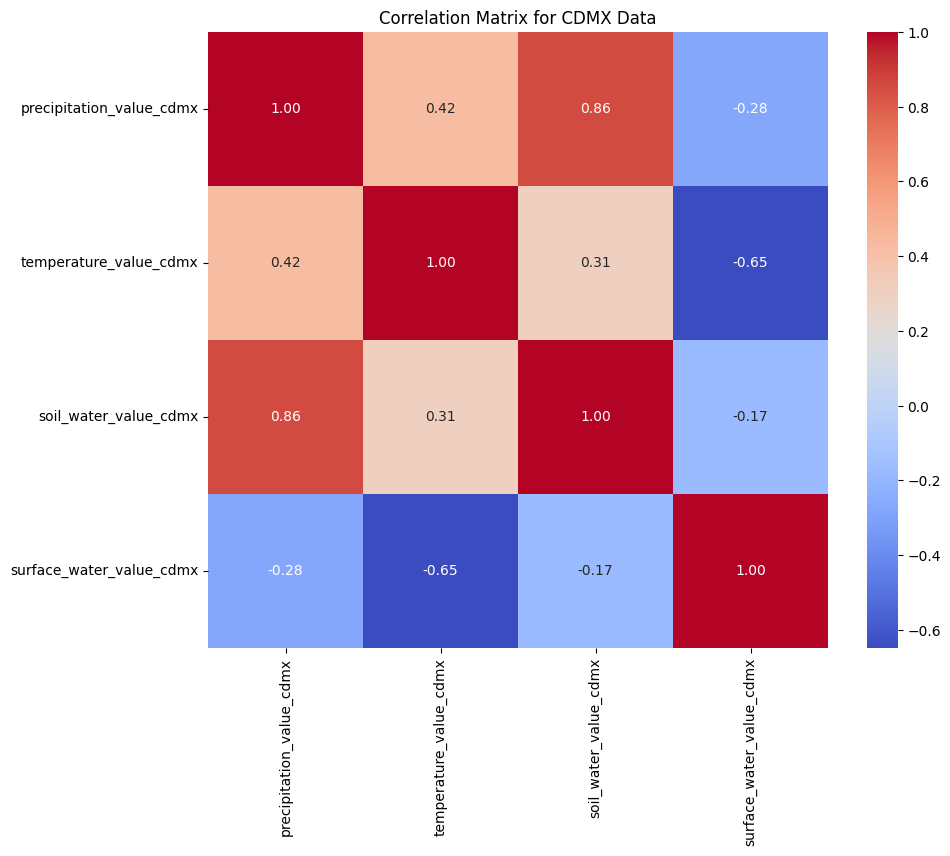

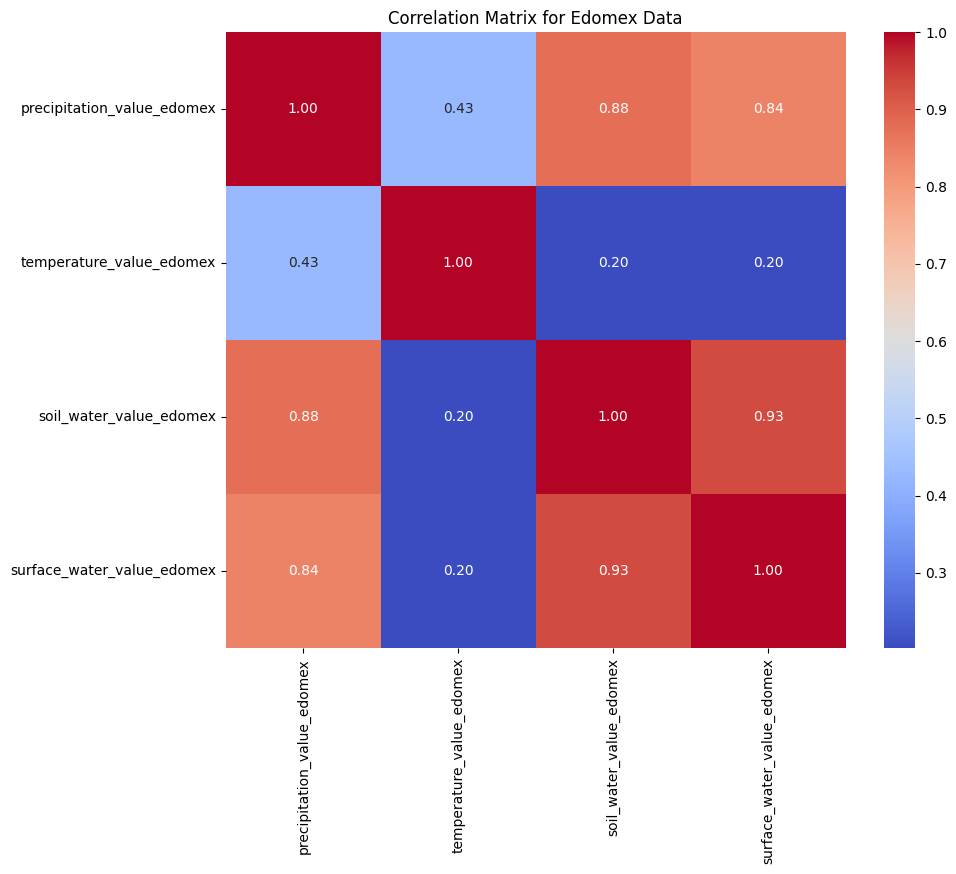

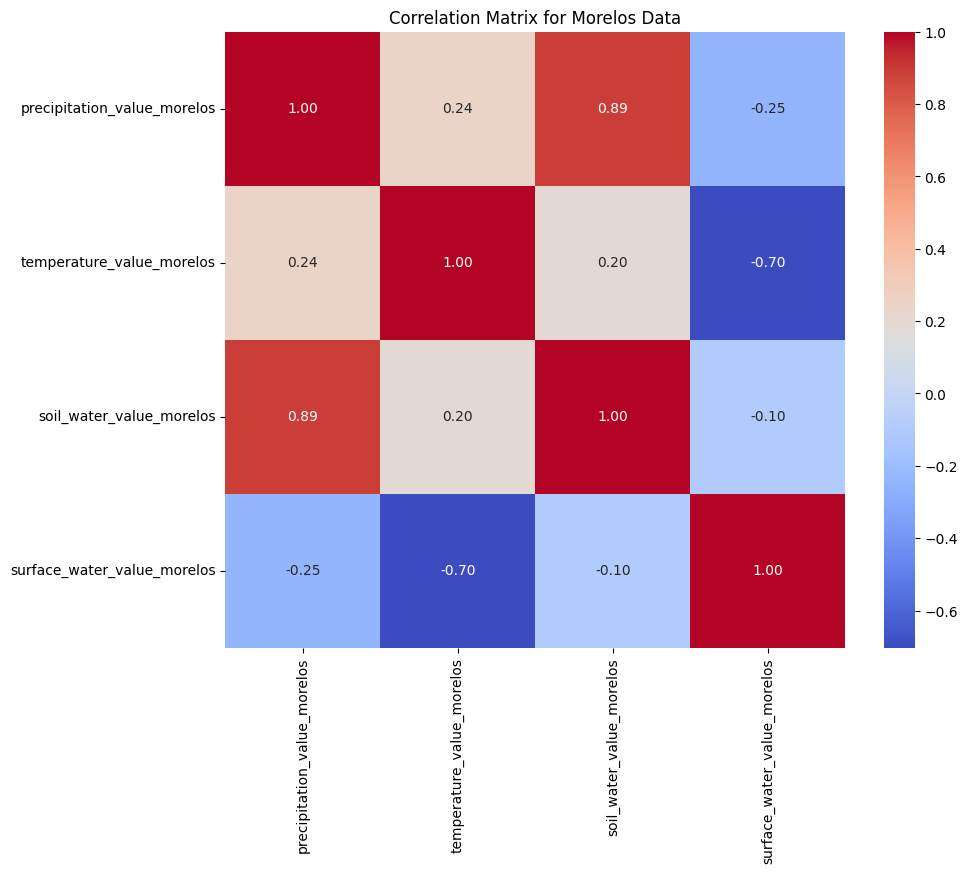

In [226]:
# Calculate the correlation matrix
def calculate_correlation_matrix(data):
    # Remove the 'date' column if it exists
    data = data.drop(columns=['date'], errors='ignore')
    correlation_matrix = data.corr()
    return correlation_matrix

# Visualize the correlation matrix
def plot_correlation_matrix(correlation_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()
    
# Calculate and display the correlation matrix for data_cdmx
correlation_matrix_cdmx = calculate_correlation_matrix(data_cdmx)
plot_correlation_matrix(correlation_matrix_cdmx, 'Correlation Matrix for CDMX Data')

# Calculate and display the correlation matrix for data_edomex
correlation_matrix_edomex = calculate_correlation_matrix(data_edomex)
plot_correlation_matrix(correlation_matrix_edomex, 'Correlation Matrix for Edomex Data')

# Calculate and display the correlation matrix for data_morelos
correlation_matrix_morelos = calculate_correlation_matrix(data_morelos)
plot_correlation_matrix(correlation_matrix_morelos, 'Correlation Matrix for Morelos Data')

### Linear regresion


Metrics for CDMX (using soil_water):
Metrics for CDMX:
Mean Squared Error (MSE): 0.012727875171061335
Mean Absolute Error (MAE): 0.08689869960774507
Root Mean Squared Error (RMSE): 0.11281788497867408
R-squared (R²): 0.7666277584431305
Mean Absolute Percentage Error (MAPE): 217.93959434224791%


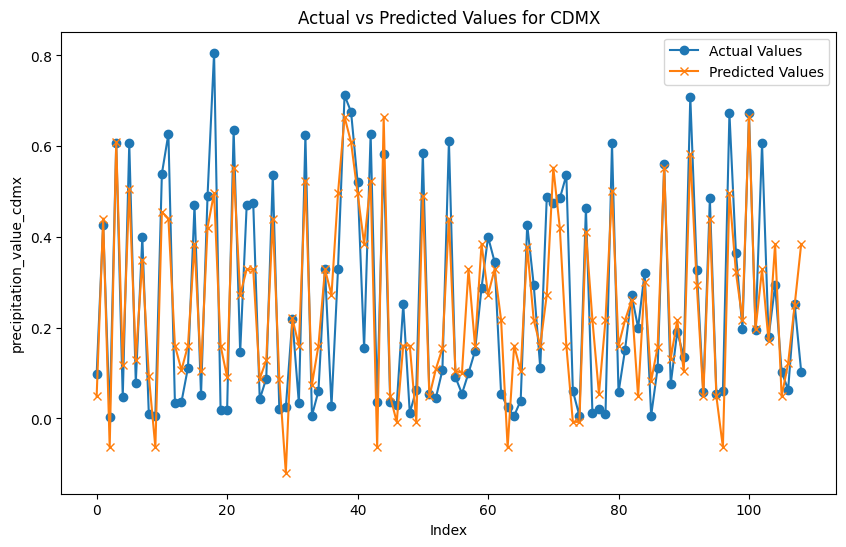


Metrics for Edomex (using soil_water, surface_water, and temperature):
Metrics for Edomex:
Mean Squared Error (MSE): 0.008698604136531394
Mean Absolute Error (MAE): 0.07048248434070536
Root Mean Squared Error (RMSE): 0.09326630761712074
R-squared (R²): 0.8791703069231194
Mean Absolute Percentage Error (MAPE): 177.15023356726513%


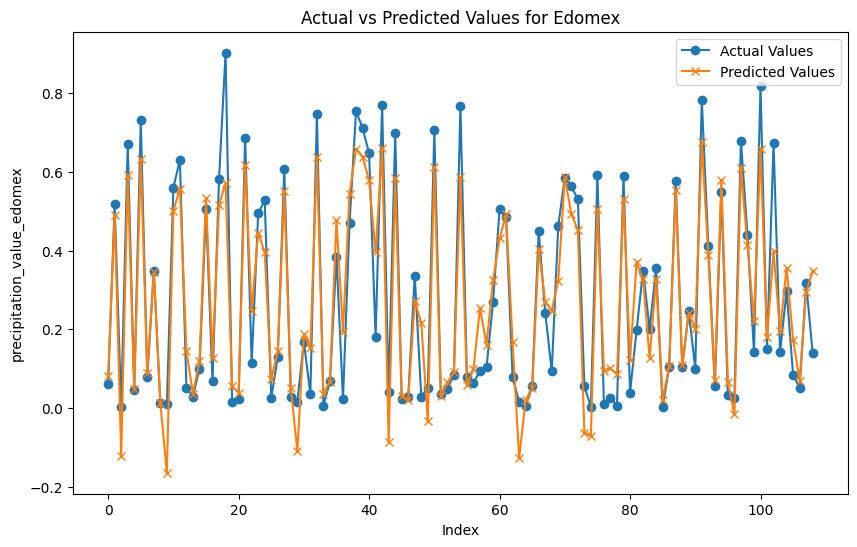


Metrics for Morelos (using soil_water):
Metrics for Morelos:
Mean Squared Error (MSE): 0.008711139852626502
Mean Absolute Error (MAE): 0.07087856089306621
Root Mean Squared Error (RMSE): 0.09333348730561021
R-squared (R²): 0.8081714466327459
Mean Absolute Percentage Error (MAPE): inf%


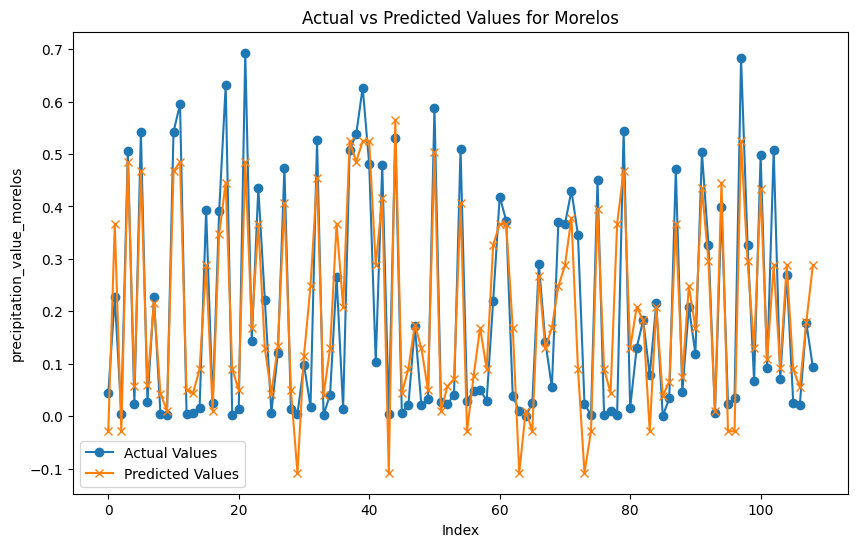

In [227]:
# Function to calculate the MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to train the model, obtain metrics, and plot
def linear_regression_metrics_and_plot(data, target_column, feature_columns, title):
    # Filter rows with no null values in the relevant columns
    complete_data = data.dropna(subset=[target_column] + feature_columns)
    
    # Define dependent and independent variables
    X = complete_data[feature_columns]
    y = complete_data[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"Metrics for {title}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Values', marker='o')
    plt.plot(y_pred, label='Predicted Values', marker='x')
    plt.title(f'Actual vs Predicted Values for {title}')
    plt.xlabel('Index')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()
    
    return model

# Define feature columns and target for CDMX
feature_columns_cdmx = ['soil_water_value_cdmx']
target_column_cdmx = 'precipitation_value_cdmx'

# Define feature columns and target for Edomex
feature_columns_edomex = ['soil_water_value_edomex', 'surface_water_value_edomex', 'temperature_value_edomex']
target_column_edomex = 'precipitation_value_edomex'

# Define feature columns and target for Morelos
feature_columns_morelos = ['soil_water_value_morelos']
target_column_morelos = 'precipitation_value_morelos'

# Get metrics for the model and plot for data_cdmx
print("Metrics for CDMX (using soil_water):")
model_cdmx = linear_regression_metrics_and_plot(data_cdmx, target_column_cdmx, feature_columns_cdmx, 'CDMX')

# Get metrics for the model and plot for data_edomex
print("\nMetrics for Edomex (using soil_water, surface_water, and temperature):")
model_edomex = linear_regression_metrics_and_plot(data_edomex, target_column_edomex, feature_columns_edomex, 'Edomex')

# Get metrics for the model and plot for data_morelos
print("\nMetrics for Morelos (using soil_water):")
model_morelos = linear_regression_metrics_and_plot(data_morelos, target_column_morelos, feature_columns_morelos, 'Morelos')

## Random forest

We followed the analysis by using a random forest model, to introduce a comparison between different models.

Metrics for CDMX (using soil_water, Random Forest):
Metrics for CDMX (Random Forest):
Mean Squared Error (MSE): 0.010563206692322594
Mean Absolute Error (MAE): 0.06307084187912472
Root Mean Squared Error (RMSE): 0.10277746198618934
R-squared (R²): 0.8063180860368001
Mean Absolute Percentage Error (MAPE): 102.8379758146871%


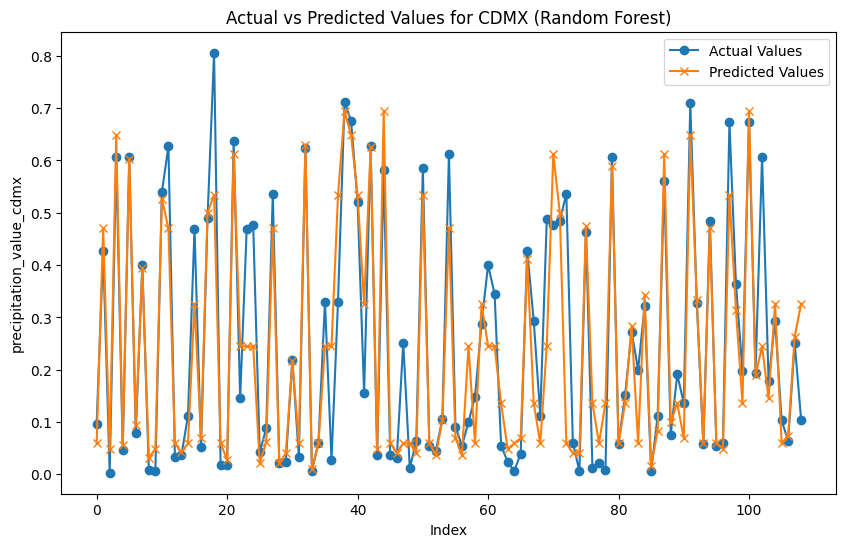


Metrics for Edomex (using soil_water, surface_water, and temperature, Random Forest):
Metrics for Edomex (Random Forest):
Mean Squared Error (MSE): 0.005704576051966095
Mean Absolute Error (MAE): 0.05063377720376467
Root Mean Squared Error (RMSE): 0.07552864391716625
R-squared (R²): 0.9207594502894988
Mean Absolute Percentage Error (MAPE): 80.7069014642803%


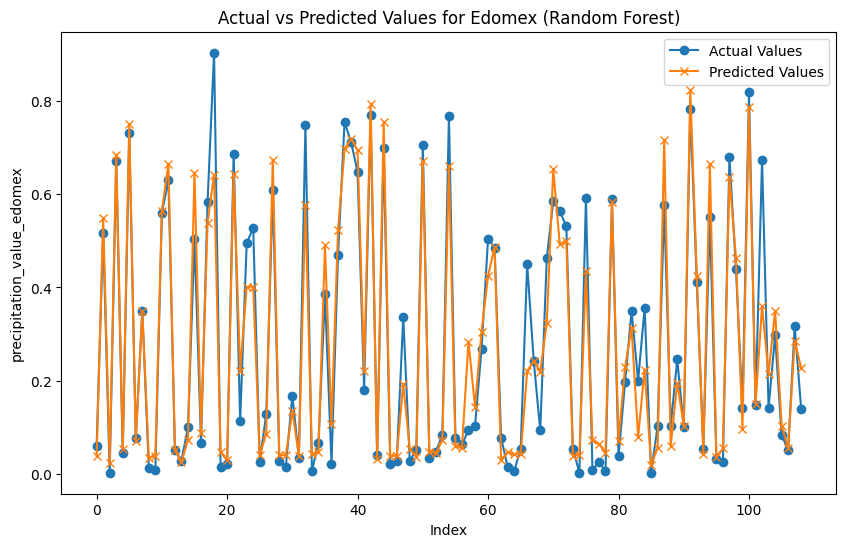


Metrics for Morelos (using soil_water, Random Forest):
Metrics for Morelos (Random Forest):
Mean Squared Error (MSE): 0.006636004917431433
Mean Absolute Error (MAE): 0.049002430140182664
Root Mean Squared Error (RMSE): 0.081461677600154
R-squared (R²): 0.8538681223140918
Mean Absolute Percentage Error (MAPE): inf%


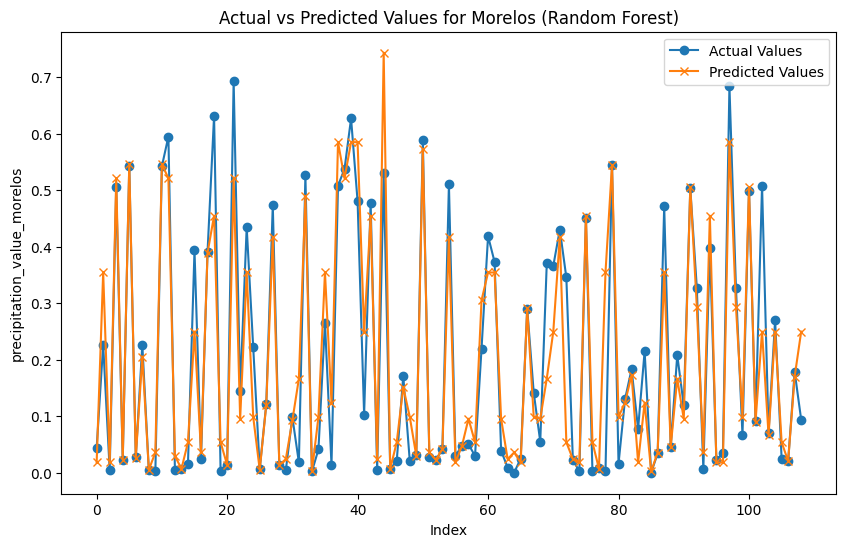

In [228]:
# Function to train the Random Forest model and obtain metrics
def random_forest_metrics_and_plot(data, target_column, feature_columns, title):
    # Filter rows with no null values in the relevant columns
    complete_data = data.dropna(subset=[target_column] + feature_columns)
    
    # Define dependent and independent variables
    X = complete_data[feature_columns]
    y = complete_data[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"Metrics for {title} (Random Forest):")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Values', marker='o')
    plt.plot(y_pred, label='Predicted Values', marker='x')
    plt.title(f'Actual vs Predicted Values for {title} (Random Forest)')
    plt.xlabel('Index')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()
    
    return model

# Get metrics for the model and plot for data_cdmx with Random Forest
print("Metrics for CDMX (using soil_water, Random Forest):")
model_cdmx_rf = random_forest_metrics_and_plot(data_cdmx, target_column_cdmx, feature_columns_cdmx, 'CDMX')

# Get metrics for the model and plot for data_edomex with Random Forest
print("\nMetrics for Edomex (using soil_water, surface_water, and temperature, Random Forest):")
model_edomex_rf = random_forest_metrics_and_plot(data_edomex, target_column_edomex, feature_columns_edomex, 'Edomex')

# Get metrics for the model and plot for data_morelos with Random Forest
print("\nMetrics for Morelos (using soil_water, Random Forest):")
model_morelos_rf = random_forest_metrics_and_plot(data_morelos, target_column_morelos, feature_columns_morelos, 'Morelos')

## SVM



Metrics for Edomex (using soil_water, surface_water, and temperature, SVM):
Metrics for Edomex (SVM):
Mean Squared Error (MSE): 0.006087207350921754
Mean Absolute Error (MAE): 0.058427920800447036
Root Mean Squared Error (RMSE): 0.0780205572328329
R-squared (R²): 0.9154444340307113
Mean Absolute Percentage Error (MAPE): 139.7448655517776%


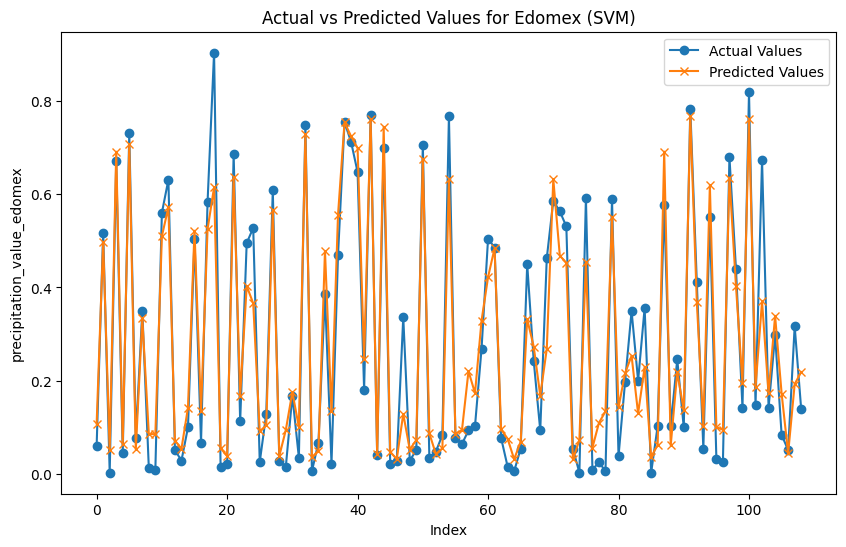

In [229]:
# Function to calculate the MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to train the SVM model and obtain metrics
def svm_regression_metrics_and_plot(data, target_column, feature_columns, title):
    # Filter rows with no null values in the relevant columns
    complete_data = data.dropna(subset=[target_column] + feature_columns)
    
    # Define dependent and independent variables
    X = complete_data[feature_columns]
    y = complete_data[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the SVM model for regression
    model = SVR(kernel='rbf')  # You can experiment with other kernels like 'linear', 'poly', etc.
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"Metrics for {title} (SVM):")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Values', marker='o')
    plt.plot(y_pred, label='Predicted Values', marker='x')
    plt.title(f'Actual vs Predicted Values for {title} (SVM)')
    plt.xlabel('Index')
    plt.ylabel(target_column)
    plt.legend()
    plt.show()
    
    return model

# Define feature columns and target for Edomex
feature_columns_edomex = ['soil_water_value_edomex', 'surface_water_value_edomex', 'temperature_value_edomex']
target_column_edomex = 'precipitation_value_edomex'

# Get metrics for the model and plot for data_edomex with SVM
print("\nMetrics for Edomex (using soil_water, surface_water, and temperature, SVM):")
model_edomex_svm = svm_regression_metrics_and_plot(data_edomex, target_column_edomex, feature_columns_edomex, 'Edomex')

Metrics for CDMX (using soil_water, SVM):
Metrics for CDMX (SVM):
Mean Squared Error (MSE): 0.012163142213179896
Mean Absolute Error (MAE): 0.08561832492945572
Root Mean Squared Error (RMSE): 0.11028663660289897
R-squared (R²): 0.776982432298
Mean Absolute Percentage Error (MAPE): 214.54643914507744%


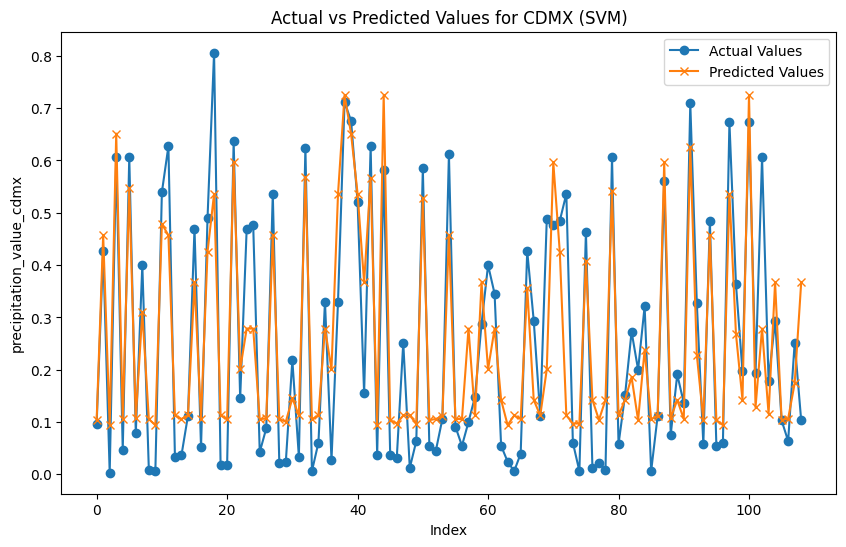

In [230]:
feature_columns_cdmx = ['soil_water_value_cdmx']
target_column_cdmx = 'precipitation_value_cdmx'

print("Metrics for CDMX (using soil_water, SVM):")
model_cdmx_svm = svm_regression_metrics_and_plot(data_cdmx, target_column_cdmx, feature_columns_cdmx, 'CDMX')



Metrics for Morelos (using soil_water, SVM):
Metrics for Morelos (SVM):
Mean Squared Error (MSE): 0.008980226371739492
Mean Absolute Error (MAE): 0.07974690881633717
Root Mean Squared Error (RMSE): 0.09476405632801654
R-squared (R²): 0.8022458756322399
Mean Absolute Percentage Error (MAPE): inf%


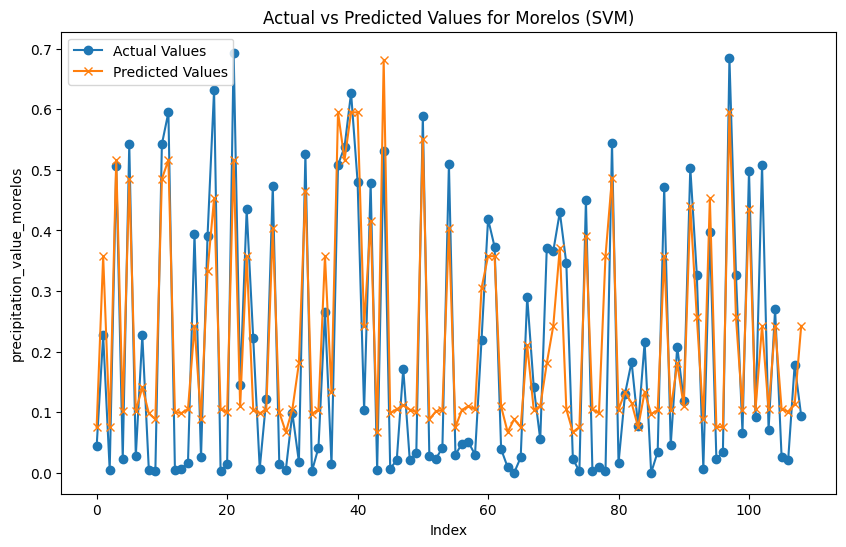

In [231]:
feature_columns_morelos = ['soil_water_value_morelos']
target_column_morelos = 'precipitation_value_morelos'

print("\nMetrics for Morelos (using soil_water, SVM):")
model_morelos_svm = svm_regression_metrics_and_plot(data_morelos, target_column_morelos, feature_columns_morelos, 'Morelos')

# Clustering


## CDMX

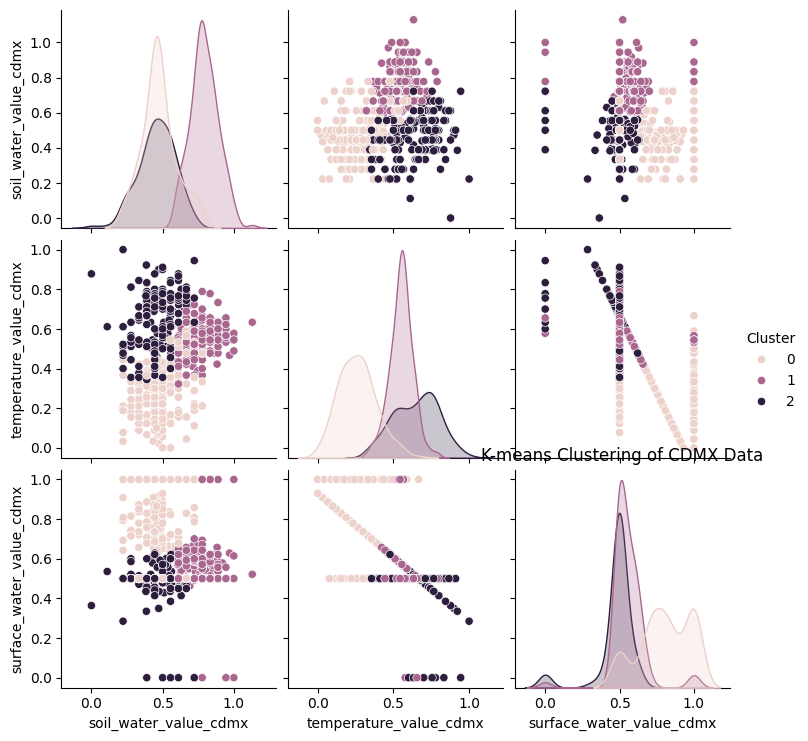

In [232]:
# Define the feature columns for clustering
feature_columns = ['soil_water_value_cdmx', 'temperature_value_cdmx', 'surface_water_value_cdmx']

# Filter rows with no null values in the relevant columns
data_clustering = data_cdmx.dropna(subset=feature_columns)

# Select features for clustering
X = data_clustering[feature_columns]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add clusters to the original DataFrame
data_clustering['Cluster'] = clusters

# Visualize the clusters
sns.pairplot(data_clustering, hue='Cluster', vars=feature_columns)
plt.title('K-means Clustering of CDMX Data')
plt.show()

### Detailed Interpretation of Clustering

The clustering performed with K-means has identified three distinct groups in the CDMX data based on the characteristics soil_water_value_cdmx, temperature_value_cdmx, and surface_water_value_cdmx. Each group (cluster) represents a set of observations that share similar characteristics. Here is a more detailed interpretation of each cluster and its possible relationship with precipitation.

#### Cluster 0 (light color)
This cluster might represent areas or periods with low soil moisture and low temperatures. The variability in surface_water_value_cdmx suggests that under these conditions, the amount of surface water can fluctuate significantly. The defining characteristics are:

* Soil Water Value: Generally low.
* Temperature Value: Generally low.
* Surface Water Value: Wider distribution, ranging from low values to relatively high values.

If the average precipitation in this cluster is low, this might indicate that low temperatures and low soil moisture are associated with lower precipitation. However, the high variability in surface water could indicate occasional episodes of high precipitation or surface water management not directly related to precipitation.

#### Cluster 1 (medium color)
This cluster may represent more balanced conditions, where neither soil moisture nor temperature is extreme, and surface water is moderate. The general characteristics are:

* Soil Water Value: Intermediate.
* Temperature Value: Intermediate.
* Surface Water Value: Relatively concentrated at intermediate values.

The average precipitation in this cluster might also be intermediate, suggesting that moderate soil moisture and temperature conditions are associated with moderate precipitation. This balance might be ideal for maintaining constant levels of surface water.

#### Cluster 2 (dark color)
This cluster could represent conditions where both soil moisture and temperature are high, and the amount of surface water is also high and more consistent. The cluster's characteristics are:

* Soil Water Value: High.
* Temperature Value: High.
* Surface Water Value: Narrower distribution, generally high.

If the average precipitation in this cluster is high, this would indicate that high temperature and high soil moisture conditions are strongly associated with higher precipitation. The high amount of surface water may reflect a greater water retention capacity under these conditions.

### Relationship Between Clusters and Precipitation

To directly relate the clusters to precipitation, we can calculate the average precipitation within each cluster and visualize it. This will help understand how the clustered characteristics are related to precipitation levels.

Cluster
0    0.078133
1    0.498021
2    0.136486
Name: precipitation_value_cdmx, dtype: float64


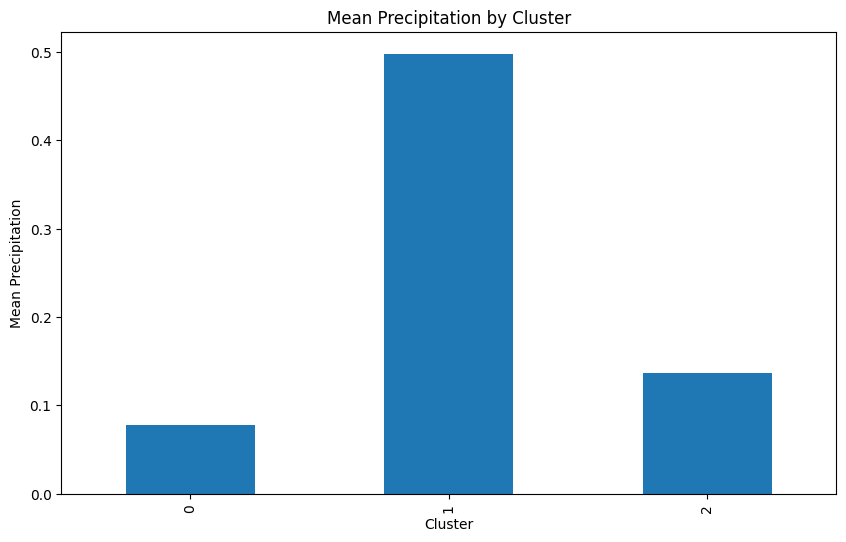

In [233]:
# Add the cluster column to the original (complete) DataFrame
data_cdmx['Cluster'] = clusters

# Calculate the mean precipitation value for each cluster
cluster_means = data_cdmx.groupby('Cluster')['precipitation_value_cdmx'].mean()
print(cluster_means)

# Plot the mean precipitation by cluster
plt.figure(figsize=(10, 6))
cluster_means.plot(kind='bar')
plt.title('Mean Precipitation by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Precipitation')
plt.show()

### Interpretation


The average precipitation by cluster graph reveals significant differences in precipitation levels associated with various groups of environmental characteristics. The detailed conclusions for each cluster are presented below:

#### **Cluster 0**
- **Low Average Precipitation**:
  - This cluster has the lowest average precipitation among the three groups.
  - **Characteristics**:
    - Low values of `soil_water_value_cdmx` and `temperature_value_cdmx`.
    - High variability in `surface_water_value_cdmx`.
  - **Interpretation**:
    - Low temperature and low soil moisture conditions are associated with lower precipitation levels.
    - The variability in surface water suggests that other factors, such as surface water management or external sources, may influence surface water levels but not direct precipitation.

#### **Cluster 1**
- **High Average Precipitation**:
  - This cluster has the highest average precipitation.
  - **Characteristics**:
    - Intermediate values of `soil_water_value_cdmx` and `temperature_value_cdmx`.
    - Relatively concentrated distribution in `surface_water_value_cdmx`.
  - **Interpretation**:
    - Moderate temperature and soil moisture conditions seem to be optimal for precipitation formation.
    - This group likely reflects environmental conditions that favor higher rainfall, possibly due to a balanced combination of moisture and temperature that facilitates condensation and precipitation.

#### **Cluster 2**
- **Moderate Average Precipitation**:
  - This cluster has an average precipitation level that is intermediate between clusters 0 and 1.
  - **Characteristics**:
    - High values of `soil_water_value_cdmx` and `temperature_value_cdmx`.
    - Narrower distribution in `surface_water_value_cdmx`.
  - **Interpretation**:
    - High temperature and high soil moisture conditions are associated with moderate precipitation.
    - Although these conditions are generally favorable for precipitation, other factors, such as high evaporation due to high temperatures, may limit the amount of rain formed.

#### **Implications**

- **Water Resource Management**:
  - Identifying clusters can help anticipate periods of higher or lower precipitation and plan accordingly.
  - In conditions similar to cluster 1, higher availability of rainwater can be expected.

- **Improvement of Predictive Models**:
  - Clusters can be used to improve the accuracy of precipitation prediction models by considering the specific environmental conditions of each group.

- **Environmental Planning and Sustainability**:
  - Understanding how different environmental conditions affect precipitation can inform decisions related to infrastructure and climate change adaptation.
  - These insights can be crucial for developing sustainability strategies and managing natural resources in Mexico City.


## EDOMEX

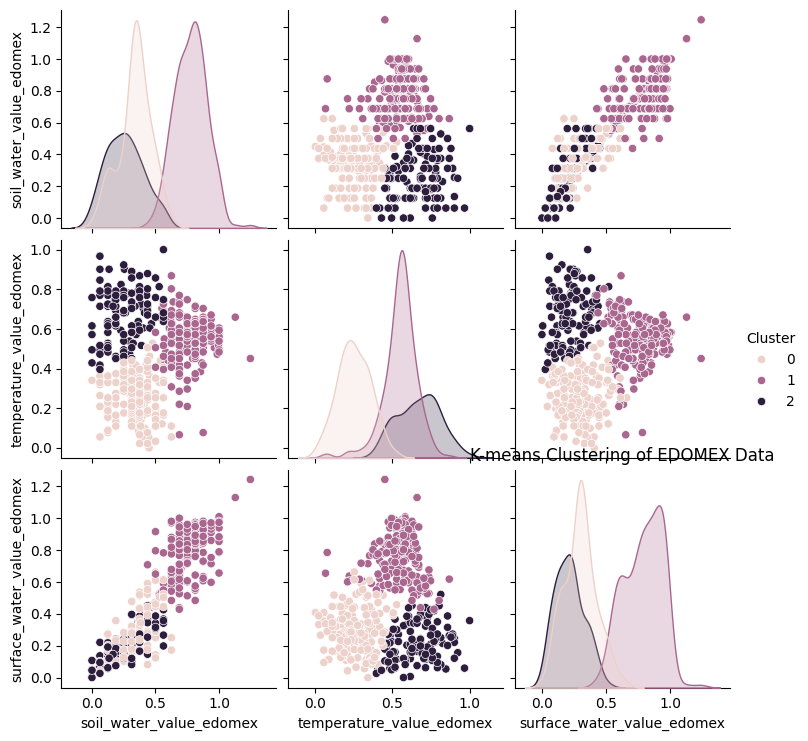

In [234]:
# Define the feature columns for clustering
feature_columns = ['soil_water_value_edomex', 'temperature_value_edomex', 'surface_water_value_edomex']

# Filter rows with no null values in the relevant columns
data_clustering = data_edomex.dropna(subset=feature_columns)

# Select features for clustering
X = data_clustering[feature_columns]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add clusters to the original DataFrame
data_clustering['Cluster'] = clusters

# Visualize the clusters
sns.pairplot(data_clustering, hue='Cluster', vars=feature_columns)
plt.title('K-means Clustering of EDOMEX Data')
plt.show()


### Interpretation of Clusters for Edomex Data

The K-means clustering analysis of Edomex data has identified three distinct clusters based on the features `soil_water_value_edomex`, `temperature_value_edomex`, and `surface_water_value_edomex`. Each cluster represents a group of observations with similar environmental characteristics. Here is a detailed interpretation of each cluster:

#### **Cluster 0 (light color)**
- **Characteristics**:
  - **Soil Water Value**: Generally low.
  - **Temperature Value**: Generally low.
  - **Surface Water Value**: Varied but generally on the lower side.
- **Interpretation**:
  - This cluster likely represents conditions where both soil moisture and temperature are relatively low. 
  - The varied surface water values suggest that despite the low soil moisture and temperature, there might be other sources contributing to surface water levels, such as irrigation or water bodies independent of direct precipitation.
- **Possible Environmental Scenario**:
  - These conditions might be indicative of cooler periods or regions with less evapotranspiration and lower soil water retention.

#### **Cluster 1 (medium color)**
- **Characteristics**:
  - **Soil Water Value**: High.
  - **Temperature Value**: High.
  - **Surface Water Value**: High, with some variability.
- **Interpretation**:
  - This cluster seems to encapsulate conditions where both soil moisture and temperature are high.
  - High values in surface water indicate that during these conditions, there is likely more precipitation or contributions from other water sources that result in higher surface water levels.
- **Possible Environmental Scenario**:
  - These conditions might represent warmer periods with higher soil water retention and potentially higher precipitation events, contributing to both soil moisture and surface water levels.

#### **Cluster 2 (dark color)**
- **Characteristics**:
  - **Soil Water Value**: Intermediate, with some overlap towards high values.
  - **Temperature Value**: Intermediate.
  - **Surface Water Value**: Intermediate, with a more concentrated distribution.
- **Interpretation**:
  - This cluster captures a balanced set of conditions with intermediate soil moisture, temperature, and surface water values.
  - The intermediate and more concentrated surface water distribution suggests a more stable environmental scenario where conditions are neither too extreme nor too mild.
- **Possible Environmental Scenario**:
  - This could represent a typical or average environmental state for Edomex, where conditions are balanced, supporting moderate levels of surface water and soil moisture.


### Relationship Between Clusters and Precipitation

To directly relate the clusters to precipitation, we can calculate the average precipitation within each cluster and visualize it. This will help understand how the clustered characteristics are related to precipitation levels.

Cluster
0    0.055543
1    0.520242
2    0.120737
Name: precipitation_value_edomex, dtype: float64


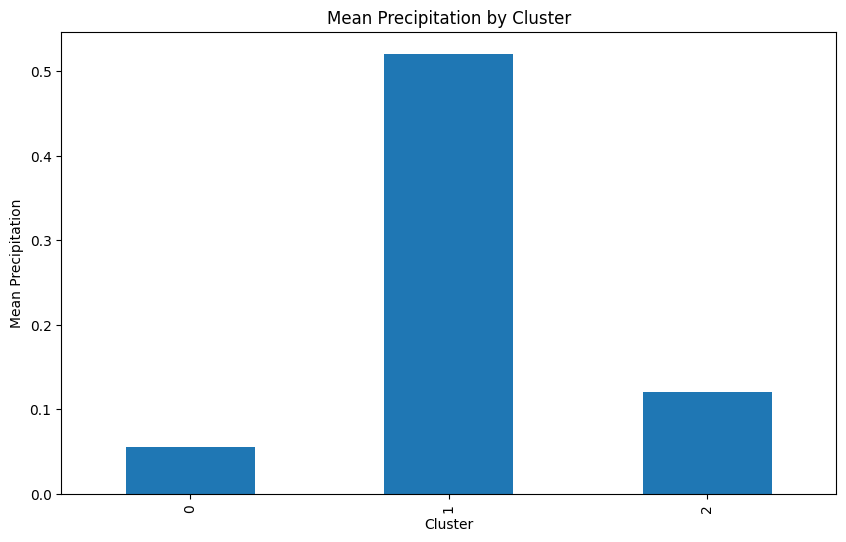

In [235]:
# Añadir la columna de clusters al DataFrame original (completo)
data_edomex['Cluster'] = clusters

# Calcular el valor medio de precipitación para cada cluster
cluster_means = data_edomex.groupby('Cluster')['precipitation_value_edomex'].mean()
print(cluster_means)

# Graficar la precipitación media por cluster
plt.figure(figsize=(10, 6))
cluster_means.plot(kind='bar')
plt.title('Mean Precipitation by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Precipitation')
plt.show()


### Interpretation

The bar chart shows the mean precipitation for each of the three clusters identified in the Edomex data. Here is a detailed interpretation of each cluster:

#### **Cluster 0**
- **Mean Precipitation**: Low
  - The bar representing Cluster 0 is the lowest, indicating that this group experiences the least amount of precipitation on average.
  - **Characteristics**:
    - **Soil Water Value**: Generally low.
    - **Temperature Value**: Generally low.
    - **Surface Water Value**: Variable but generally on the lower side.
  - **Interpretation**:
    - Conditions with low soil moisture and low temperatures are associated with lower precipitation levels. This suggests that cooler and drier conditions do not favor precipitation.
    - The variability in surface water levels indicates that other factors, such as irrigation or localized water sources, might influence surface water more than direct precipitation in this cluster.

#### **Cluster 1**
- **Mean Precipitation**: High
  - The bar representing Cluster 1 is the highest, showing that this cluster experiences the highest average precipitation.
  - **Characteristics**:
    - **Soil Water Value**: High.
    - **Temperature Value**: High.
    - **Surface Water Value**: High, with some variability.
  - **Interpretation**:
    - Conditions with high soil moisture and high temperatures are strongly associated with higher precipitation levels. This suggests that warmer and wetter conditions create an environment conducive to precipitation.
    - High values in surface water levels indicate that during these conditions, there is likely more precipitation or contributions from other water sources that result in higher surface water levels.

#### **Cluster 2**
- **Mean Precipitation**: Moderate
  - The bar representing Cluster 2 is higher than Cluster 0 but lower than Cluster 1, indicating that this group experiences moderate precipitation levels on average.
  - **Characteristics**:
    - **Soil Water Value**: Intermediate, with some overlap towards high values.
    - **Temperature Value**: Intermediate.
    - **Surface Water Value**: Intermediate, with a more concentrated distribution.
  - **Interpretation**:
    - Conditions with intermediate soil moisture and temperature are associated with moderate precipitation levels. This indicates that balanced environmental conditions do not result in extreme precipitation levels.
    - The more concentrated distribution of surface water suggests a stable environmental scenario where conditions are neither too extreme nor too mild, supporting moderate levels of precipitation.

## MORELOS

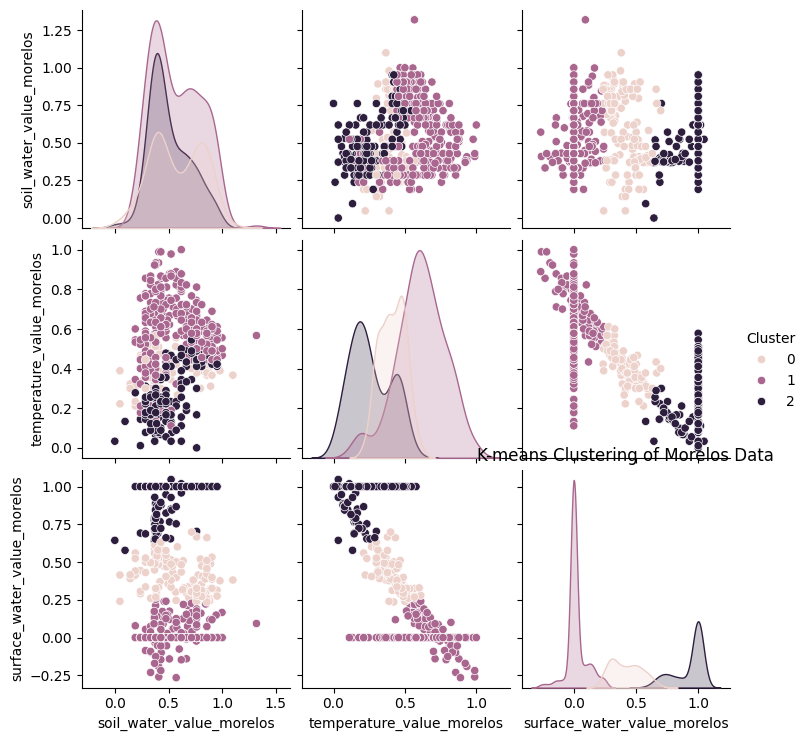

In [236]:
# Define the feature columns for clustering
feature_columns = ['soil_water_value_morelos', 'temperature_value_morelos', 'surface_water_value_morelos']

# Filter rows with no null values in the relevant columns
data_clustering = data_morelos.dropna(subset=feature_columns)

# Select features for clustering
X = data_clustering[feature_columns]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add clusters to the original DataFrame
data_clustering['Cluster'] = clusters

# Visualize the clusters
sns.pairplot(data_clustering, hue='Cluster', vars=feature_columns)
plt.title('K-means Clustering of Morelos Data')
plt.show()


### Interpretation

The K-means clustering analysis of Morelos data has identified three distinct clusters based on the features `soil_water_value_morelos`, `temperature_value_morelos`, and `surface_water_value_morelos`. Each cluster represents a group of observations with similar environmental characteristics. Here is a detailed interpretation of each cluster:

#### **Cluster 0 (light color)**
- **Characteristics**:
  - **Soil Water Value**: Generally low to moderate.
  - **Temperature Value**: Generally low to moderate.
  - **Surface Water Value**: Generally low.
- **Interpretation**:
  - This cluster likely represents conditions where soil moisture and temperature are relatively low to moderate.
  - The low surface water values suggest that these conditions are not favorable for the accumulation of surface water, possibly due to limited precipitation or high evaporation rates.
- **Possible Environmental Scenario**:
  - These conditions might indicate cooler and drier periods or regions with less evapotranspiration and lower soil water retention.

#### **Cluster 1 (medium color)**
- **Characteristics**:
  - **Soil Water Value**: Generally high.
  - **Temperature Value**: Generally high.
  - **Surface Water Value**: Moderate to high.
- **Interpretation**:
  - This cluster seems to encapsulate conditions where both soil moisture and temperature are high.
  - Higher values in surface water indicate that during these conditions, there is likely more precipitation or contributions from other water sources that result in higher surface water levels.
- **Possible Environmental Scenario**:
  - These conditions might represent warmer periods with higher soil water retention and potentially higher precipitation events, contributing to both soil moisture and surface water levels.

#### **Cluster 2 (dark color)**
- **Characteristics**:
  - **Soil Water Value**: Intermediate, with a tendency towards high values.
  - **Temperature Value**: Intermediate.
  - **Surface Water Value**: Intermediate.
- **Interpretation**:
  - This cluster captures a balanced set of conditions with intermediate soil moisture, temperature, and surface water values.
  - The intermediate values suggest a more stable environmental scenario where conditions are neither too extreme nor too mild.
- **Possible Environmental Scenario**:
  - This could represent typical or average environmental conditions for Morelos, where conditions are balanced, supporting moderate levels of soil moisture and surface water.


### Relationship Between Clusters and Precipitation

To directly relate the clusters to precipitation, we can calculate the average precipitation within each cluster and visualize it. This will help understand how the clustered characteristics are related to precipitation levels.

Cluster
0    0.225955
1    0.229872
2    0.105799
Name: precipitation_value_morelos, dtype: float64


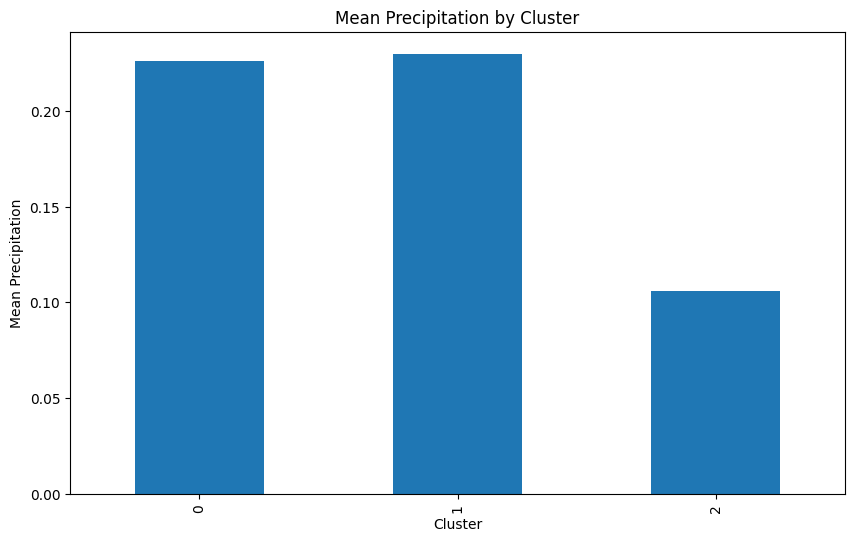

In [237]:
# Añadir la columna de clusters al DataFrame original (completo)
data_morelos['Cluster'] = clusters

# Calcular el valor medio de precipitación para cada cluster
cluster_means = data_morelos.groupby('Cluster')['precipitation_value_morelos'].mean()
print(cluster_means)

# Graficar la precipitación media por cluster
plt.figure(figsize=(10, 6))
cluster_means.plot(kind='bar')
plt.title('Mean Precipitation by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Precipitation')
plt.show()


### Interpretation


The average precipitation by cluster graph reveals significant differences in precipitation levels associated with various groups of environmental characteristics. The detailed conclusions for each cluster are presented below:

#### **Cluster 0**
- **Low Average Precipitation**:
  - This cluster has the lowest average precipitation among the three groups.
  - **Characteristics**:
    - Low values of `soil_water_value_cdmx` and `temperature_value_cdmx`.
    - High variability in `surface_water_value_cdmx`.
  - **Interpretation**:
    - Low temperature and low soil moisture conditions are associated with lower precipitation levels.
    - The variability in surface water suggests that other factors, such as surface water management or external sources, may influence surface water levels but not direct precipitation.

#### **Cluster 1**
- **High Average Precipitation**:
  - This cluster has the highest average precipitation.
  - **Characteristics**:
    - Intermediate values of `soil_water_value_cdmx` and `temperature_value_cdmx`.
    - Relatively concentrated distribution in `surface_water_value_cdmx`.
  - **Interpretation**:
    - Moderate temperature and soil moisture conditions seem to be optimal for precipitation formation.
    - This group likely reflects environmental conditions that favor higher rainfall, possibly due to a balanced combination of moisture and temperature that facilitates condensation and precipitation.

#### **Cluster 2**
- **Moderate Average Precipitation**:
  - This cluster has an average precipitation level that is intermediate between clusters 0 and 1.
  - **Characteristics**:
    - High values of `soil_water_value_cdmx` and `temperature_value_cdmx`.
    - Narrower distribution in `surface_water_value_cdmx`.
  - **Interpretation**:
    - High temperature and high soil moisture conditions are associated with moderate precipitation.
    - Although these conditions are generally favorable for precipitation, other factors, such as high evaporation due to high temperatures, may limit the amount of rain formed.

#### **Implications**

- **Water Resource Management**:
  - Identifying clusters can help anticipate periods of higher or lower precipitation and plan accordingly.
  - In conditions similar to cluster 1, higher availability of rainwater can be expected.

- **Improvement of Predictive Models**:
  - Clusters can be used to improve the accuracy of precipitation prediction models by considering the specific environmental conditions of each group.

- **Environmental Planning and Sustainability**:
  - Understanding how different environmental conditions affect precipitation can inform decisions related to infrastructure and climate change adaptation.
  - These insights can be crucial for developing sustainability strategies and managing natural resources in Mexico City.


# Model ensemble

We also proposed a model ensamble, using the previously studied models of linear regression, random forest and SVM. The technique to decide the result of the ensemble, is to calculate an average among the predictions of the distinct models.

CDMX:
Ensemble Model Metrics for precipitation_value_cdmx:
Mean Squared Error (MSE): 0.007444443488472756
Mean Absolute Error (MAE): 0.055893932491907286
Root Mean Squared Error (RMSE): 0.0862811884971038
R-squared (R²): 0.8635022389284276
Mean Absolute Percentage Error (MAPE): 94.65912985042421%


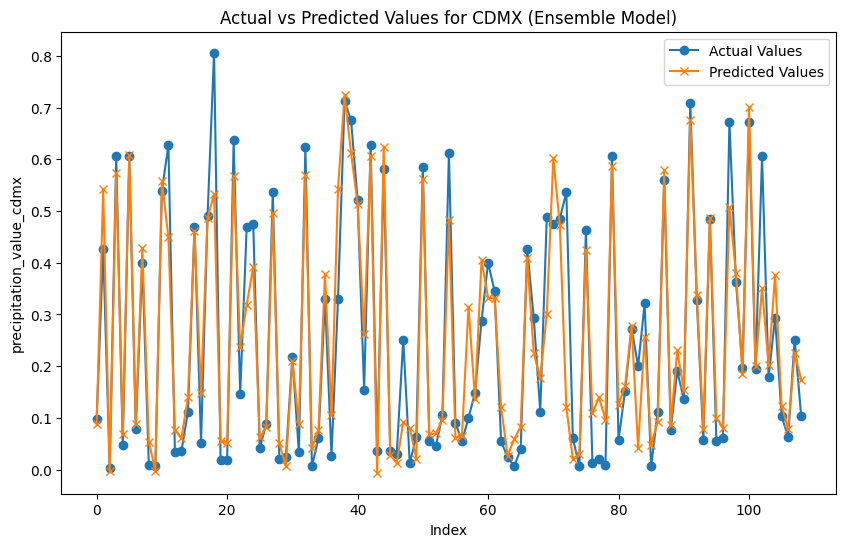


Edomex:
Ensemble Model Metrics for precipitation_value_edomex:
Mean Squared Error (MSE): 0.0052994003645221175
Mean Absolute Error (MAE): 0.05197870662823393
Root Mean Squared Error (RMSE): 0.07279698046294308
R-squared (R²): 0.9263876238662759
Mean Absolute Percentage Error (MAPE): 87.45979315442423%


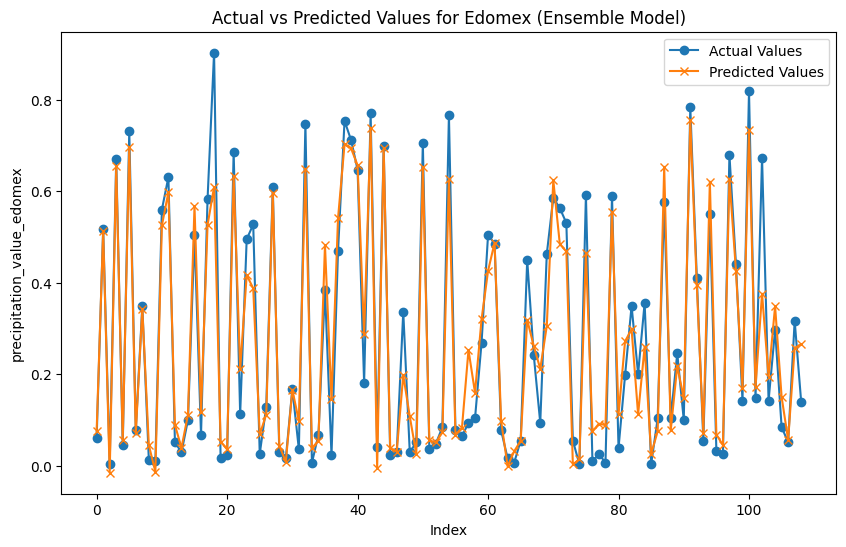


Morelos:
Ensemble Model Metrics for precipitation_value_morelos:
Mean Squared Error (MSE): 0.0045054810833884155
Mean Absolute Error (MAE): 0.048957011358830536
Root Mean Squared Error (RMSE): 0.06712288047594811
R-squared (R²): 0.9007845203874968
Mean Absolute Percentage Error (MAPE): inf%


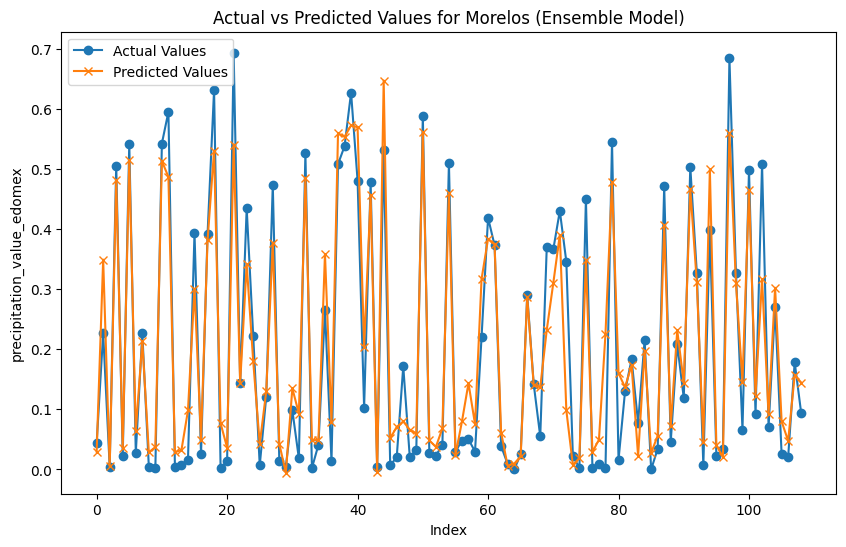

In [238]:

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to train and predict using multiple models
def train_and_predict_ensemble(data, target_column, feature_columns):
    # Filter rows with no null values in relevant columns
    complete_data = data.dropna(subset=[target_column] + feature_columns)
    
    # Define dependent and independent variables
    X = complete_data[feature_columns]
    y = complete_data[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Train Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # Train SVM model for regression
    svm_model = SVR(kernel='rbf')
    svm_model.fit(X_train, y_train)
    
    # Make predictions
    rf_pred = rf_model.predict(X_test)
    lr_pred = lr_model.predict(X_test)
    svm_pred = svm_model.predict(X_test)
    
    # Average predictions
    ensemble_pred = (rf_pred + lr_pred + svm_pred) / 3
    
    # Evaluate the model
    mse = mean_squared_error(y_test, ensemble_pred)
    mae = mean_absolute_error(y_test, ensemble_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, ensemble_pred)
    mape = mean_absolute_percentage_error(y_test, ensemble_pred)
    
    print(f"Ensemble Model Metrics for {target_column}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    
    return rf_model, lr_model, svm_model, ensemble_pred, y_test

# Function to classify clusters using K-means
def classify_clusters(data, feature_columns, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data[feature_columns])
    data['Cluster'] = clusters
    return data, kmeans

# Define feature columns and target for CDMX
feature_columns_cdmx = ['soil_water_value_cdmx', 'surface_water_value_cdmx', 'temperature_value_cdmx']
target_column_cdmx = 'precipitation_value_cdmx'

# Train and predict using ensemble model for CDMX
print("CDMX:")
rf_model_cdmx, lr_model_cdmx, svm_model_cdmx, ensemble_pred_cdmx, y_test_cdmx = train_and_predict_ensemble(data_cdmx, target_column_cdmx, feature_columns_cdmx)

# Plot actual vs predicted values for CDMX
plt.figure(figsize=(10, 6))
plt.plot(y_test_cdmx.values, label='Actual Values', marker='o')
plt.plot(ensemble_pred_cdmx, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values for CDMX (Ensemble Model)')
plt.xlabel('Index')
plt.ylabel(target_column_cdmx)
plt.legend()
plt.show()

# Classify into clusters using K-means for CDMX
data_cdmx, kmeans_cdmx = classify_clusters(data_cdmx, feature_columns_cdmx)


# Define feature columns and target for Edomex
feature_columns_edomex = ['soil_water_value_edomex', 'surface_water_value_edomex', 'temperature_value_edomex']
target_column_edomex = 'precipitation_value_edomex'

# Train and predict using ensemble model for Edomex
print("\nEdomex:")
rf_model_edomex, lr_model_edomex, svm_model_edomex, ensemble_pred_edomex, y_test_edomex = train_and_predict_ensemble(data_edomex, target_column_edomex, feature_columns_edomex)

# Plot actual vs predicted values for Edomex
plt.figure(figsize=(10, 6))
plt.plot(y_test_edomex.values, label='Actual Values', marker='o')
plt.plot(ensemble_pred_edomex, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values for Edomex (Ensemble Model)')
plt.xlabel('Index')
plt.ylabel(target_column_edomex)
plt.legend()
plt.show()

# Classify into clusters using K-means for Edomex
data_edomex, kmeans_edomex = classify_clusters(data_edomex, feature_columns_edomex)


# Define feature columns and target for Morelos
feature_columns_morelos = ['soil_water_value_morelos', 'surface_water_value_morelos', 'temperature_value_morelos']
target_column_morelos = 'precipitation_value_morelos'

# Train and predict using ensemble model for Morelos
print("\nMorelos:")
rf_model_morelos, lr_model_morelos, svm_model_morelos, ensemble_pred_morelos, y_test_morelos = train_and_predict_ensemble(data_morelos, target_column_morelos, feature_columns_morelos)

# Plot actual vs predicted values for Edomex
plt.figure(figsize=(10, 6))
plt.plot(y_test_morelos.values, label='Actual Values', marker='o')
plt.plot(ensemble_pred_morelos, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values for Morelos (Ensemble Model)')
plt.xlabel('Index')
plt.ylabel(target_column_edomex)
plt.legend()
plt.show()

# Classify into clusters using K-means for Edomex
data_edomex, kmeans_edomex = classify_clusters(data_edomex, feature_columns_edomex)


## Variant for getting individual points

In [239]:
# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to train and predict using multiple models
def train_and_predict_ensemble(data, target_column, feature_columns):
    # Filter rows with no null values in relevant columns
    complete_data = data.dropna(subset=[target_column] + feature_columns)
    
    # Define dependent and independent variables
    X = complete_data[feature_columns]
    y = complete_data[target_column]
    
    # Split the data into training (70%) and testing (30%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Train Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # Train SVM model for regression
    svm_model = SVR(kernel='rbf')
    svm_model.fit(X_train, y_train)
    
    return rf_model, lr_model, svm_model, X_test, y_test

# Function to classify clusters using K-means
def classify_clusters(data, feature_columns, target_column, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data[feature_columns])
    data['Cluster'] = clusters
    
    cluster_means = data.groupby('Cluster')[target_column].mean().to_dict()
    data['Cluster Mean'] = data['Cluster'].map(cluster_means)
    
    return data, kmeans

# Function to predict the value and cluster of test rows and store them in a DataFrame
def predict_and_save(data, X_test, y_test, feature_columns, target_column, rf_model, lr_model, svm_model, kmeans):
    cluster_interpretations = {
        0: "Low soil moisture and temperature with varied surface water.",
        1: "High soil moisture and temperature with high surface water.",
        2: "Moderate conditions with balanced soil moisture, temperature, and surface water."
    }
    
    cluster_precipitation_interpretations = {
        0: "Low average precipitation.",
        1: "High average precipitation.",
        2: "Moderate average precipitation."
    }
    
    results = []
    for i in range(len(X_test)):
        X_row = X_test.iloc[i].values.reshape(1, -1)
        y_true = y_test.iloc[i]
        
        rf_pred = rf_model.predict(X_row)[0]
        lr_pred = lr_model.predict(X_row)[0]
        svm_pred = svm_model.predict(X_row)[0]
        
        ensemble_pred = (rf_pred + lr_pred + svm_pred) / 3
        
        cluster = kmeans.predict(X_row)[0]
        interpretation = cluster_interpretations[cluster]
        cluster_mean = data[data['Cluster'] == cluster][target_column].mean()
        precipitation_interpretation = f"{cluster_precipitation_interpretations[cluster]} (Average: {cluster_mean:.2f})"
        
        results.append({
            'Real Value': y_true, 
            'Predicted Value': ensemble_pred, 
            'Cluster': cluster,
            'Interpretation': interpretation,
            'Precipitation Interpretation': precipitation_interpretation
        })
    
    results_df = pd.DataFrame(results)
    return results_df

# Define feature columns and target for CDMX
feature_columns_cdmx = ['soil_water_value_cdmx', 'surface_water_value_cdmx', 'temperature_value_cdmx']
target_column_cdmx = 'precipitation_value_cdmx'

# Train and predict using ensemble model for CDMX
#print("CDMX:")
rf_model_cdmx, lr_model_cdmx, svm_model_cdmx, X_test_cdmx, y_test_cdmx = train_and_predict_ensemble(data_cdmx, target_column_cdmx, feature_columns_cdmx)

# Classify into clusters using K-means for CDMX
data_cdmx, kmeans_cdmx = classify_clusters(data_cdmx, feature_columns_cdmx, target_column_cdmx)

# Predict and save results for CDMX test set
results_df_cdmx = predict_and_save(data_cdmx, X_test_cdmx, y_test_cdmx, feature_columns_cdmx, target_column_cdmx, rf_model_cdmx, lr_model_cdmx, svm_model_cdmx, kmeans_cdmx)
#print(results_df_cdmx)

# Define feature columns and target for Edomex
feature_columns_edomex = ['soil_water_value_edomex', 'surface_water_value_edomex', 'temperature_value_edomex']
target_column_edomex = 'precipitation_value_edomex'

# Train and predict using ensemble model for Edomex
#print("\nEdomex:")
rf_model_edomex, lr_model_edomex, svm_model_edomex, X_test_edomex, y_test_edomex = train_and_predict_ensemble(data_edomex, target_column_edomex, feature_columns_edomex)

# Classify into clusters using K-means for Edomex
data_edomex, kmeans_edomex = classify_clusters(data_edomex, feature_columns_edomex, target_column_edomex)

# Predict and save results for Edomex test set
results_df_edomex = predict_and_save(data_edomex, X_test_edomex, y_test_edomex, feature_columns_edomex, target_column_edomex, rf_model_edomex, lr_model_edomex, svm_model_edomex, kmeans_edomex)
#print(results_df_edomex)

# Define feature columns and target for Morelos
feature_columns_morelos = ['soil_water_value_morelos', 'surface_water_value_morelos', 'temperature_value_morelos']
target_column_morelos = 'precipitation_value_morelos'

# Train and predict using ensemble model for Morelos
#print("\nMorelos:")
rf_model_morelos, lr_model_morelos, svm_model_morelos, X_test_morelos, y_test_morelos = train_and_predict_ensemble(data_morelos, target_column_morelos, feature_columns_morelos)

# Classify into clusters using K-means for Morelos
data_morelos, kmeans_morelos = classify_clusters(data_morelos, feature_columns_morelos, target_column_morelos)

# Predict and save results for Morelos test set
results_df_morelos = predict_and_save(data_morelos, X_test_morelos, y_test_morelos, feature_columns_morelos, target_column_morelos, rf_model_morelos, lr_model_morelos, svm_model_morelos, kmeans_morelos)
#print(results_df_morelos)


In [240]:
results_df_cdmx

,Real Value,Predicted Value,Cluster,Interpretation,Precipitation Interpretation
0,0.096970,0.091557,2,Moderate conditions with balanced soil moistur...,Moderate average precipitation. (Average: 0.14)
1,0.427273,0.551480,1,High soil moisture and temperature with high s...,High average precipitation. (Average: 0.50)
2,0.003030,0.002897,0,Low soil moisture and temperature with varied ...,Low average precipitation. (Average: 0.08)
3,0.606061,0.578279,1,High soil moisture and temperature with high s...,High average precipitation. (Average: 0.50)
4,0.047348,0.059400,0,Low soil moisture and temperature with varied ...,Low average precipitation. (Average: 0.08)
...,...,...,...,...,...
159,0.069697,0.037725,0,Low soil moisture and temperature with varied ...,Low average precipitation. (Average: 0.08)
160,0.454545,0.453675,1,High soil moisture and temperature with high s...,High average precipitation. (Average: 0.50)
161,0.439394,0.486946,1,High soil moisture and temperature with high s...,High average precipitation. (Average: 0.50)
162,0.278788,0.299817,0,Low soil moisture and temperature with varied ...,Low average precipitation. (Average: 0.08)


In [241]:
results_df_edomex

,Real Value,Predicted Value,Cluster,Interpretation,Precipitation Interpretation
0,0.061489,0.069678,2,Moderate conditions with balanced soil moistur...,Moderate average precipitation. (Average: 0.12)
1,0.517799,0.515187,1,High soil moisture and temperature with high s...,High average precipitation. (Average: 0.52)
2,0.003236,-0.018446,0,Low soil moisture and temperature with varied ...,Low average precipitation. (Average: 0.06)
3,0.669903,0.622414,1,High soil moisture and temperature with high s...,High average precipitation. (Average: 0.52)
4,0.045712,0.049038,0,Low soil moisture and temperature with varied ...,Low average precipitation. (Average: 0.06)
...,...,...,...,...,...
159,0.067961,0.013138,0,Low soil moisture and temperature with varied ...,Low average precipitation. (Average: 0.06)
160,0.569579,0.523492,1,High soil moisture and temperature with high s...,High average precipitation. (Average: 0.52)
161,0.488673,0.399408,1,High soil moisture and temperature with high s...,High average precipitation. (Average: 0.52)
162,0.349515,0.532771,1,High soil moisture and temperature with high s...,High average precipitation. (Average: 0.52)


In [242]:
results_df_morelos

,Real Value,Predicted Value,Cluster,Interpretation,Precipitation Interpretation
0,0.043478,0.026327,1,High soil moisture and temperature with high s...,High average precipitation. (Average: 0.23)
1,0.226545,0.359077,0,Low soil moisture and temperature with varied ...,Low average precipitation. (Average: 0.23)
2,0.004577,0.004962,2,Moderate conditions with balanced soil moistur...,Moderate average precipitation. (Average: 0.11)
3,0.505721,0.503722,1,High soil moisture and temperature with high s...,High average precipitation. (Average: 0.23)
4,0.023169,0.030497,2,Moderate conditions with balanced soil moistur...,Moderate average precipitation. (Average: 0.11)
...,...,...,...,...,...
159,0.027460,0.060168,2,Moderate conditions with balanced soil moistur...,Moderate average precipitation. (Average: 0.11)
160,0.430206,0.410687,0,Low soil moisture and temperature with varied ...,Low average precipitation. (Average: 0.23)
161,0.489703,0.348141,1,High soil moisture and temperature with high s...,High average precipitation. (Average: 0.23)
162,0.187643,0.270985,2,Moderate conditions with balanced soil moistur...,Moderate average precipitation. (Average: 0.11)


# References

[1] Wickham, H. (2014). Tidy Data. Journal of Statistical Software, 59(10), 1–23. https://doi.org/10.18637/jss.v059.i10